# Quantum Computing

## Table of Contents <a name="table-of-contents"></a>

1. [Quantum States](#quantum-states)
    - [Dirac Notation](#dirac-notation)
    - [Vector Notation](#vector-notation)
    - [Simulating Qubits](#simulating-qubits)
    
    
2. [Quantum Gates](#quantum-gates)
    - [Hadamard Gate](#hadamard-gate)
    - [Phase Shift Gate](#phase-shift-gate)
    - [Controlled NOT Gate](#controlled-not-gate)
    - [Adapting Matrices to Multi-qubit Circuits](#multi-qubit-circuits)
        - [Hadamard Gate](#multi-qubit-hadamard-gate)
        - [Phase Shift Gate](#multi-qubit-phase-shift-gate)
        - [Controlled NOT Gate](#multi-qubit-controlled-not-gate)
        
        
3. [Quantum Simulators](#quantum-simulators)
    - [Quantum Circuits](#quantum-circuits)
    - [Unitary Matrix](#unitary-matrix)
    - [State-to-State Transformation](#state-to-state-transformation)
    - [Sparse Matrix](#sparse-matrix)
    - [No Matrix](#no-matrix)
    - [Performance Comparison](#performance-comparison)
    
    
4. [Non-Atomic Gates](#non-atomic-gates)
    - [Pauli Gates](#pauli-gates)
    - [Rotation Operator Gates](#rotation-operator-gates)
    - [Swap Gate](#swap-gate)
    - [Controlled Phase Shift Gate](#controlled-phase-shift-gate)
    
    
5. [Phase Estimation](#phase-estimation)
    - [Introduction](#introduction)
    - [Algorithm Walk-through](#algorithm-walk-through)
    - [Implementation](#implementation)
    
    
6. [Shor's Algorithm](#shor's-algorithm)

## Quantum States [🔝](#table-of-contents) <a name="quantum-states"></a>

### Dirac Notation [🔝](#table-of-contents) <a name="dirac-notation"></a>

A **qubit** is a "quantum bit" that owns a state of either 0 or 1. Unlike in the classical interpretaion that the bit should be either 0 or 1 exclusively at a time, a qubit can be "partially" 0 and partially 1. We specify the "partially" by a complex number called **amplitude**. For example, $|\psi\rangle = \sqrt{0.2}|{0}\rangle + i\sqrt{0.8}|1\rangle$ represents a legal state of a qubit, where $\sqrt{0.2}$ and $i\sqrt{0.8}$ are the amplitudes of state $0$ and $1$, respectively. We call this "$|\rangle$" form of vectors the **Dirac notation**, which is widely used in quantum mechanics. 

In specific, $|\rangle$ is called a **ket**, which usually represents a column vectors of complex numbers. There's also a similar form of vector, $\langle|$, which is called a **bra**, representing a row vector (can you see the "bra-ket" reference here? That's why Dirac notation is also called the **bra-ket notation**). If a bra is acting on a ket, it will result in a complex number, denoted by $\langle|\rangle$. Note the in bras, the entries are actually the conjugate of the entries in the original vector. 

For example, let $\psi = (1 + 2i, 2 - i)$ be a vector, then:

$$
    \begin{align*}
        |\psi\rangle 
        = \begin{bmatrix}
            1 + 2i \\ 2 - i
        \end{bmatrix}
        \qquad
        \langle\psi|
        = \begin{bmatrix}
            1 - 2i & 2 + i
        \end{bmatrix}
        \qquad
        \langle\psi|\psi\rangle
        = (1 + 2i)(1 - 2i) + (2 - i)(2 + i)
        = 10
    \end{align*}
$$

Back to qubits. Now, the certificate for a legal qubit is that the sqaures of the amplitudes sum up to $1$. There will be no surprise if you know that these factors are essentially the square roots of the probability of each state. 

If the state is represented by multiple qubits, we need more factors to describe the probability distribution. In gerneral it's $2^w$ factors for a $w$-qubit state. For example:

$$
    \alpha|00\rangle + \beta|01\rangle + \gamma|10\rangle + \delta|11\rangle \quad \alpha, \beta, \gamma, \delta \in \mathbb{C}
$$

is the general form for 2-qubit quantum states. A concrete example may be $\sqrt{0.1}|00\rangle + \sqrt{0.4}|01\rangle -\sqrt{0.5}|11\rangle$. For simplicity (arguable), we can also write the bits in base 10, in which case we will have $\sqrt{0.1}|0\rangle + \sqrt{0.4}|1\rangle - \sqrt{0.5}|3\rangle$ for the same example.

If we already have two wires each carrying one qubit of states $\psi_1$ and $\psi_2$, how can we get the overall state? i.e. how to get the 4 factors out of the original ones? Say $\psi_1 = \sqrt{0.2}|0\rangle + \sqrt{0.8}|1\rangle$, $\psi_2 = \sqrt{0.4}|0\rangle + \sqrt{0.6}|1\rangle$, the tensor product is helpful here:

$$
\begin{align*}
    \psi &= \psi_1 \otimes \psi_2 \\
    &= (\sqrt{0.2}|0\rangle + \sqrt{0.8}|1\rangle)\otimes(\sqrt{0.4}|0\rangle + \sqrt{0.6}|1\rangle) \\
    &= \sqrt{0.2\times0.4}|00\rangle + \sqrt{0.2\times0.6}|01\rangle + \sqrt{0.8\times0.4}|10\rangle + \sqrt{0.8\times0.6}|11\rangle \\
    &= \sqrt{0.08}|00\rangle + \sqrt{0.12}|01\rangle + \sqrt{0.32}|10\rangle + \sqrt{0.48}|11\rangle
\end{align*}
$$

Note that *not* all states can be derived from tensor products. States that can be represented as a tensor product are called **product states**. Others are called **entangled states**. An example of the latter is $\psi = \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|10\rangle$, in which case the measured results of the qubits are dependent on each other (say we get 1 for the first qubit, then it's sure the other qubit is 0).

### Vector Notation [🔝](#table-of-contents) <a name="vector-notation"></a>

Another notation for quantum states is the **vector notation**. Since conventially, each possible state are listed in the increasing order, we can just keep the amplitudes of each state and write them in the vector form. For example, $\psi = \sqrt{0.2}|0\rangle + \sqrt{0.8}|1\rangle$ can be equivalently written as:

$$
    \psi = 
    \begin{bmatrix}
        \sqrt{0.2} \\ \sqrt{0.8}
    \end{bmatrix}
$$

Note that in this notation we cannot omit the items with 0 amplitude.

It's natural to consider each possible state as a basic vector, so that the total state can be represented by the weighed sum of these vectors, just like how we interpret a vector in $\mathbb{R}^k$. For example, for a $w$-qubit state where $w = 2$, we have the following basic vectors in $\mathbb{R}^{2^w}$:

$$
    |00\rangle =
    \begin{bmatrix}
        1 \\ 0 \\ 0 \\ 0
    \end{bmatrix}
    \qquad
    |01\rangle =
    \begin{bmatrix}
        0 \\ 1 \\ 0 \\ 0
    \end{bmatrix}
    \qquad
    |10\rangle =
    \begin{bmatrix}
        0 \\ 0 \\ 1 \\ 0
    \end{bmatrix}
    \qquad
    |11\rangle =
    \begin{bmatrix}
        0 \\ 0 \\ 0 \\ 1
    \end{bmatrix}
$$

Then, a state $\psi = \sqrt{0.08}|00\rangle + \sqrt{0.12}|01\rangle + \sqrt{0.32}|10\rangle + \sqrt{0.48}|11\rangle$ can be written in the following vector form:

$$
\begin{align*}
    \psi &= \sqrt{0.08}|00\rangle + \sqrt{0.12}|01\rangle + \sqrt{0.32}|10\rangle + \sqrt{0.48}|11\rangle \\
    &=
    \sqrt{0.08}\,
    \begin{bmatrix}
        1 & 0 & 0 & 0
    \end{bmatrix}^T + 
    \sqrt{0.12}\,
    \begin{bmatrix}
        0 & 1 & 0 & 0
    \end{bmatrix}^T + 
    \sqrt{0.32}\,
    \begin{bmatrix}
        0 & 0 & 1 & 0
    \end{bmatrix}^T + 
    \sqrt{0.48}\,
    \begin{bmatrix}
        0 & 0 & 0 & 1
    \end{bmatrix} \\
    &= 
    \begin{bmatrix}
        0.08 & 0.12 & 0.32 & 0.48
    \end{bmatrix}^T
\end{align*}
$$

Earlier we've said that the square sum of all amplitudes should be $1$, this can be formally expressed in mathematical form (recall the definition of bra):

$$
    \langle \psi|\psi\rangle = |\psi\rangle(|\psi\rangle^T)^* = 1
$$


We will find vectors very helpful later when doing calculations.

### Simulating Qubits [🔝](#table-of-contents) <a name="simulating-qubits"></a>

We will use data structures in python to simulate qubits. Let's first import some useful packages:

In [2]:
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy
from numpy import pi, e, kron, sqrt, random
from itertools import chain
import os
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Gate, ControlledGate
from scipy import sparse
import time
from IPython.display import display, Javascript
Javascript("Jupyter.notebook.execute_cells([-1,-3,-5])")

<IPython.core.display.Javascript object>

A state can be expressed in the following form:

In [6]:
state = [
    (numpy.sqrt(0.1), '00'),
    (numpy.sqrt(0.4), '01'),
    (numpy.sqrt(0.5), '11')
]

The following function is used to print a state in the dirac notation, one in binary and one in decimal

In [7]:
def print_dirac_binary(state):
    result = '('
    for (p, bits) in state:
        result += str(p) + ' |' + bits + '> + '
    result = result[:-3] + ')'
    print(result)

def print_dirac_decimal(state):
    result = '('
    for (p, bits) in state:
        result += str(p) + ' |' + binary_to_decimal(bits) + '> + '
    result = result[:-3] + ')'
    print(result)

Here's the effect:

In [7]:
print_dirac_binary(state)
print_dirac_decimal(state)

(0.31622776601683794 |00> + 0.6324555320336759 |01> + 0.7071067811865476 |11>)
(0.31622776601683794 |0> + 0.6324555320336759 |1> + 0.7071067811865476 |3>)


We may also want to convert between states and their vector forms:

In [8]:
def state_to_vector(state):
    state.sort(key=lambda s: s[1])
    limit = 2 ** len(state[0][1])
    result = numpy.zeros(limit, dtype=numpy.complex64)
    j = 0
    for i in range(0, limit):
        if j in range(0, len(state)):
            (p, bits) = state[j]
        if 'p' in locals() and i == int(bits, 2):
            result[i] = p
            j += 1
        else:
            result[i] = 0.0 + 0.0j
    return result

def vector_to_state(vec):
    length = math.frexp(len(vec))[1] - 1  
    return [(p, decimal_to_binary(i, length)) for i, p in enumerate(vec) if not math.isclose(p.real, 0) or not math.isclose(p.imag, 0)]

Let's see what we've got:

In [9]:
print(state_to_vector(state))
print_dirac_binary(vector_to_state(state_to_vector(state)))

[0.31622776+0.j 0.6324555 +0.j 0.        +0.j 0.70710677+0.j]
((0.31622776+0j) |00> + (0.6324555+0j) |01> + (0.70710677+0j) |11>)


Finally, it could be helpful to write a function to check validity of states and vectors of quantum systems, i.e. whether the possiblilies of states sum up to 1:

In [9]:
def check_state_validity(state):
    s = 0
    for (p, bits) in state:
        s += p * p.conj()
    return math.isclose(s.real, 1.0) and math.isclose(s.imag, 0.0)
def check_vector_validity(vec):
    s = 0
    for p in vec:
        s += p * p.conj()
    return math.isclose(s.real, 1.0) and math.isclose(s.imag, 0.0)

## Quantum Gates [🔝](#table-of-contents) <a name="quantum-gates"></a>

Just like logic gates for classical system, there are **quantum gates** that modify the states of a quantum system. Let's introduce some of them:

### Hadamard Gate [🔝](#table-of-contents) <a name="hadamard-gate"></a>

The Hadamard gate operates on a single qubit with the following mapping rule:

$$
    |0\rangle \mapsto \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
    \qquad
    |1\rangle \mapsto \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle
$$

It turns out that the two results above appear quite often in quantum computing. We can use $|+\rangle$ and $|-\rangle$ to denote them, in which case the Hadamard transformation is defined as:

$$
    |0\rangle \mapsto |+\rangle
    \qquad
    |1\rangle \mapsto |-\rangle
$$

As usual, it can be represented by a matrix:

$$
    H = \frac{1}{\sqrt{2}}
    \begin{bmatrix}
        1 & 1 \\ 1 & -1
    \end{bmatrix}
$$

For a 1-qubit state, we can apply $H$ to it to get the state after the Hadamard gate. Say $\psi = \sqrt{0.5}|0\rangle + \sqrt{0.5}|1\rangle$, then:

$$
    H\psi = 
    \frac{1}{\sqrt{2}}
    \begin{bmatrix}
        1 & 1 \\ 1 & -1
    \end{bmatrix}
    \begin{bmatrix}
        \sqrt{0.5} \\ \sqrt{0.5}
    \end{bmatrix}
    = 
    \begin{bmatrix}
        1 \\ 0
    \end{bmatrix}
    = |0\rangle
$$

A Hadamard gate in quantum circuits are usually depicted as follows:

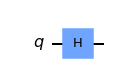

In [11]:
draw_hadamard_gate() # defined at the end of the notebook

### Phase Shift Gate [🔝](#table-of-contents) <a name="phase-shift-gate"></a>

The phase shift gate has the following rule:

$$
    |0\rangle \mapsto |0\rangle
    \qquad
    |1\rangle \mapsto e^{i\theta}|1\rangle
$$

Here $\theta$ is some given value. Note that the probability of either $|0\rangle$ or $|1\rangle$ doesn't change, since $|e^{i\theta}|$ is always 1. It, however, modifies the phase of the quantum state.

The matrix form is as follows:

$$
    P(\theta) =
    \begin{bmatrix}
        1 & 0 \\ 0 & e^{i\theta}
    \end{bmatrix}
$$

The plot version of a phase shift gate is:

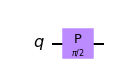

In [12]:
draw_phase_gate(numpy.pi/2) # defined at the end of the notebook

### Controlled NOT Gate [🔝](#table-of-contents) <a name="controlled-not-gate"></a>

The CNOT gate is a controlled gate that takes two qubits and performs NOT operation on the second qubit (**target**) if the first qubit (**control**) is 1:

$$
    |00\rangle \mapsto |00\rangle
    \qquad
    |01\rangle \mapsto |01\rangle
    \qquad
    |10\rangle \mapsto |11\rangle
    \qquad
    |11\rangle \mapsto |10\rangle
$$

If we carefully look into this tranformation, the output qubit (the second qubit on the right side) is actually the XOR of the input qubit and the control qubit. The difference is that we preserve one of the inputs, namely the control qubit. Thus, it's always possible to reverse the process using that control qubit.

The matrix form of the CNOT gate is:

$$
    \text{CNOT} =
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0
    \end{bmatrix}
$$

The CNOT gate is depicted as follows:

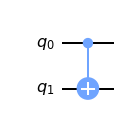

In [18]:
draw_cnot_gate() # defined at the end of the notebook

If we flip the control and target, the CNOT matrix (I will call it "TONC" in this notebook; but note that it's an informal name) would be:

$$
    \text{TONC} =
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 0 & 0 & 1 \\
        0 & 0 & 1 & 0 \\
        0 & 1 & 0 & 0
    \end{bmatrix}
$$

which can be drawn like:

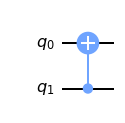

In [19]:
draw_tonc_gate() # defined at the end of the notebook

It might be beyond the coverage of this notebook, but we can actually construct the "flipped" CNOT gate from the Hadamard and the CNOT gate<sup>[\[1\]][1]</sup>:

[1]: <https://quantumcomputing.stackexchange.com/questions/5179/how-to-construct-matrix-of-regular-and-flipped-2-qubit-cnot> "Source"

$$
    \text{TONC} = (H \otimes H)\ \text{CNOT}\ (H \otimes H)
$$

The three gates introduced above will be our **universal gate set**, like the NAND and NOR gates among the classical gates. In other words, we can use these three gates to perform anything in quantum computing. All the gates we will learn later can be constructed from the universal gates.

Here's a typical quantum circuit consisting of Hadamard, phase shift, and CNOT gates:

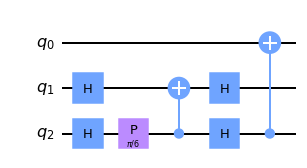

In [20]:
draw_qcircuit_example() # defined at the end of the notebook

We can simulate these gates and quantum circuits by defining variables and functions:

In [10]:
H = numpy.array([[1, 1], [1, -1]]) / numpy.sqrt(2)
def P(theta):
    return numpy.array([[1, 0], [0, numpy.exp(1j * theta)]])
CNOT = numpy.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
TONC = numpy.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])

Let's first try trivial cases to show that these matrices work:

In [24]:
state = state_to_vector([(numpy.sqrt(0.1), '0'), (numpy.sqrt(0.9), '1')])
controlled_state = state_to_vector([(numpy.sqrt(0.1), '00'), (numpy.sqrt(0.2), '01'), (numpy.sqrt(0.3), '10'), (numpy.sqrt(0.4), '11')])
print(H @ state)
print(P(numpy.pi) @ state)
print(CNOT @ controlled_state)

[ 0.89442721+0.j -0.44721361+0.j]
[ 0.31622776+0.00000000e+00j -0.94868332+1.16180199e-16j]
[0.31622776+0.j 0.44721359+0.j 0.63245553+0.j 0.54772258+0.j]


We can also check our formula for $\text{TONC}$ actually works:

In [11]:
# I need to use `approximate` helper function to get rid of numerical errors.
TONC == approximate(kron(H, H) @ CNOT @ kron(H, H))

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

### Adapt Matrices to Multi-Qubit Circuits [🔝](#table-of-contents) <a name="multi-quibit-circuits"></a>

In real quantum circuits, there are always more than one qubits, yet each quantum gate only affect one to several qubits. Therefore, we need to adjust our matrices so that for arbitrary count of qubits we can map them to the correct result.

#### Hadamard Gate [🔝](#table-of-contents) <a name="multi-qubit-hadamard-gate"></a>

For example, let $\Psi = \sqrt{0.1}|00\rangle + \sqrt{0.2}|01\rangle + \sqrt{0.3}|10\rangle + \sqrt{0.4}|11\rangle$. the Hadamard gate on the second qubit will trasform $\Psi$ into:

$$
    H(2, 2)\Psi = \sqrt{0.1}|00\rangle + \sqrt{0.2}|01\rangle + \frac{\sqrt{0.3} + \sqrt{0.4}}{\sqrt{2}}|10\rangle + \frac{\sqrt{0.3} - \sqrt{0.4}}{\sqrt{2}}|11\rangle
$$

Here $H(i, k)$ stands for an extended Hadamard matrix taht has $k$ qubits in total, but only the $i$-th will be affected. To construct this matrix, we need to find patterns in $H(i, k)$. Let's start with some examples:

$$
    H(1, 2) = 
    \begin{bmatrix}
        \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} & 0 \\
        0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} \\
        \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} & 0 \\
        0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}}
    \end{bmatrix}
    \qquad
    H(2, 2) = 
    \begin{bmatrix}
        \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 \\
        \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 \\
        0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
        0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
    \end{bmatrix} \\
    H(1, 3) = 
    \begin{bmatrix}
        \frac{1}{\sqrt{2}} & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 \\
        0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & 0 \\
        0 & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 \\
        0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & \frac{1}{\sqrt{2}} \\
        \frac{1}{\sqrt{2}} & 0 & 0 & 0 & -\frac{1}{\sqrt{2}} & 0 & 0 & 0 \\
        0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & -\frac{1}{\sqrt{2}} & 0 & 0 \\
        0 & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & -\frac{1}{\sqrt{2}} & 0 \\
        0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & -\frac{1}{\sqrt{2}} \\
    \end{bmatrix}
    \qquad
    H(2, 3) = 
    \begin{bmatrix}
        \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 & 0 \\
        0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 \\
        \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 & 0 \\
        0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} & 0 \\
        0 & 0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} \\
        0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} & 0 \\
        0 & 0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} \\
    \end{bmatrix} \\
    H(3, 3) = 
    \begin{bmatrix}
        \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 & 0 & 0 \\
        \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 \\
        0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 \\
        0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
        0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\
    \end{bmatrix}
$$

If you are aware, $H(1, 2)$ resembles $H(1, 1)$, $H(2, 2)$ resembles $H(1, 1)$, $H(1, 3)$ resembles $H(1, 2)$, and $H(2, 3)$ resembles $H(1, 2)$. To explore these similarities, let's introduce the **Kronecker product** between two matrices. Suppose $A$, $B$ are square matrices of mxm and nxn, then:

$$
    A \otimes B =
    \begin{bmatrix}
        a_{11} & \dots & a_{1m} \\
        \vdots & \ddots & \vdots \\
        a_{m1} & \dots & a_{mm}
    \end{bmatrix}
    \otimes
    \begin{bmatrix}
        b_{11} & \dots & b_{1n} \\
        \vdots & \ddots & \vdots \\
        b_{n1} & \dots & b_{nn}
    \end{bmatrix}
    =
    \begin{bmatrix}
        \begin{matrix}
            a_{11}b_{11} & \dots & a_{11}b_{1n} \\
            \vdots & \ddots & \vdots \\
            a_{11}b_{n1} & \dots & a_{11}b_{nn}
        \end{matrix}
        & \dots &
        \begin{matrix}
            a_{1m}b_{11} & \dots & a_{1m}b_{1n} \\
            \vdots & \ddots & \vdots \\
            a_{1m}b_{n1} & \dots & a_{1m}b_{nn}
        \end{matrix} \\
        \vdots & \ddots & \vdots \\
        \begin{matrix}
            a_{m1}b_{11} & \dots & a_{m1}b_{1n} \\
            \vdots & \ddots & \vdots \\
            a_{m1}b_{m1} & \dots & a_{m1}b_{mm}
        \end{matrix}
        & \dots &
        \begin{matrix}
            a_{mm}b_{11} & \dots & a_{mm}b_{1n} \\
            \vdots & \ddots & \vdots \\
            a_{mm}b_{m1} & \dots & a_{mm}b_{mm}
        \end{matrix}
    \end{bmatrix}
$$

It's almost identical to the tensor product (and even shares the operator), but it restricts the operands to be in a space of matrices. Now look at the examples we gave before, it's not hard to come up with:

$$
    H(1, 2) = H \otimes I \qquad H(2, 2) = I \otimes H \\
    H(1, 3) = H \otimes I \otimes I  \qquad H(2, 3) = I \otimes H \otimes I \qquad H(3, 3) = I \otimes I \otimes H
$$

The pattern is obvious. Let me write down the general form (the product notation used below is *not* conventional, the multiplicative operator should be $\otimes$ instead of $\times$):

$$
    H(i, k) = \left(\prod_1^{i-1} I\right)\otimes H \otimes \left(\prod_{i+1}^k I\right)
$$



#### Phase Shift Gate [🔝](#table-of-contents) <a name="multi-qubit-phase-shift-gate"></a>

With the conclusion of extended Hadamard matrix, we can easily get the extended version of phase shift matrix. $P(\theta, i, k)$, where $i$ , $k$ represent for transformed qubit and the total count of qubits, can be calculated as follows:

$$
    P(\theta, i, k) = \left(\prod_1^{i-1} I\right)\otimes P(\theta) \otimes \left(\prod_{i+1}^k I\right)
$$

#### CNOT Gate [🔝](#table-of-contents) <a name="multi-qubit-controlled-not-gate"></a>

The big challenge comes from the CNOT gate. So far, we *cannot* give a general matrix of the form $CNOT(c, i, k)$, where $c$ is for the control qubit, $i$ for the transformed qubit, and $k$ for the total count of qubits. This will be resolved later in another way to simulate quantum circuits (and we will learn how to contruct its matrix form even later), but for now we will just use $CNOT(i, k)$, where $i$ is the control qubit, and $i + 1$ is the transformed qubit (or conversely).

The following are functions to generate extended matrices for the three quantum gates we discussed before:

In [12]:
# calculate I x ... x mat x ... x I
# where `x` is the kronecker operator
def kronecker_product(mat, i, k):
    result = numpy.array([[1]])
    for j in range(1, i):
        result = numpy.kron(result, I2)
    result = numpy.kron(result, mat)
    for j in range(i + 1, k + 1):
        result = numpy.kron(result, I2)
    return result

# Note that all following indices are 1-indexed.
def hadamard_matrix(i, k):
    if k >= 14:
        print("The input is too large, expect to wait exponential time.")
    return kronecker_product(H, i, k)

def phase_matrix(theta, i, k):
    if k >= 14:
        print("The input is too large, expect to wait exponential time.")
    return kronecker_product(P(theta), i, k)

def cnot_matrix(ctrl, i, k):
    if ctrl + 1 == i:
        return kronecker_product(CNOT, ctrl, k-1)
    elif ctrl - 1 == i:
        return kronecker_product(TONC, i, k-1)
    else:
        print("We cannot do long-range CNOT so far.")
        return numpy.identity(2 ** k)

Now that any gates of any-qubit system can be represented by matrices, we can move on and try to construct a quantum simulator.

## Quantum Simulators [🔝](#table-of-contents) <a name="quantum-simulators"></a>


### Quantum Circuits [🔝](#table-of-contents) <a name="quantum-circuits"></a>

Let's first look at an example of quantum circuit:

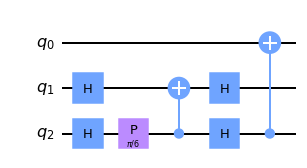

In [25]:
draw_qcircuit_example()

It is equivalent to the following sequence of commands:

```python
QC 3
INITSTATE BASIS |100>
H 1
H 2
P pi/6 2
CNOT 2 1
H 1
H 2
CNOT 2 0
```

The first line gives the count of qubits in the circuit, the second line gives the initial state (if not given, the default input state will be $|0...0\rangle$, and each of the following lines is a gate. The gates are already topologically sorted, so we don't need to worry about the ordering problems. Now, given a text file like the above, we will simulate the qunatum circuit and give random results based on the probabililty of each possible states at the end of the circuit.

We will first need a parser to extract the commands and arguments from a circuit text file:

In [13]:
def read_circuit_file(file_name):
    lines = open(file_name).readlines()
    result = []
    wire_ct = int(lines[0].split()[1])
    for line in lines[1:]:
        result.append(line.split())
    return (wire_ct, result)

def write_circuit_text(w, circ):
    result = ''
    result += str(w) + '\n'
    for gate in circ:
        for elem in gate:
            result += str(elem) + ' '
        result += '\n'
    return result

Here are parsed data from two prepared examples:

In [27]:
circ_1 = read_circuit_file('data/1.circuit')
print(circ_1)
circ_2 = read_circuit_file('data/2.circuit')
print(circ_2)

(3, [['INITSTATE', 'BASIS', '|000>'], ['H', '1'], ['CNOT', '1', '2'], ['P', '0', '0.45']])
(3, [['H', '1'], ['H', '2'], ['P', 'pi/6', '2'], ['CNOT', '2', '1'], ['H', '1'], ['H', '2'], ['CNOT', '2', '0']])


Also, for a final vector of probabilities of states, we would like to define a random number generator to give a result:

In [14]:
def measure(state_vec):
    bits = []
    width = int(math.log(len(state_vec), 2.0))
    for i in range(0, len(state_vec)):
        bits.append(decimal_to_binary(i, width))
    p_vec = (state_vec * state_vec.conj()).view(numpy.float64)[::2]
    while True:
        yield numpy.random.choice(bits, 1, p=p_vec)[0]

When we get a list of measurements, we can draw a histogram to show the probability distribution:

In [15]:
def draw_histogram(mlist):
    mlist = [int(binary_to_decimal(x)) for x in mlist]
    if all(m == 0 for m in mlist):
        plt.hist([0], width=0.2)
    else:
        plt.hist(mlist, weights=numpy.ones_like(mlist)/numpy.sum(mlist), width=1)
    return plt.show()

### Unitary Matrix [🔝](#table-of-contents) <a name="unitary-matrix"></a>

Since each command is essentially a linear transformation, we can represent the whole quantum circuit by a complex matrix $U$, which is the product of all matrices. We call it an **unitary matrix** because it has the following property:

$$
    UU^\dagger = U^\dagger U = I
$$

where $U$ is a square matrix and $U^\dagger$ is its conjugate transpose, i.e. $U^\dagger = (U^*)^T$. For example, for a 2x2 matrix $U \in GL(\mathbb{C})$:

$$
    U = 
    \begin{bmatrix}
        a & b \\ c & d
    \end{bmatrix}
$$

It's conjugate transpose is:

$$
    U^\dagger = 
    \begin{bmatrix}
        a^* & c^* \\ b^* & d^*
    \end{bmatrix}
$$

It's not hard to confirm that all three matrices we had ($H$, $P(\theta)$, and $CNOT$) are unitary, then it's plain that their products are also unitary, since for any unitary matrix $U_1, U_2$, we have:

$$
    \begin{align*}
        (U_1U_2)(U_1U_2)^\dagger &= (U_1U_2)(U_2^\dagger U_1^\dagger) \\
        &= U_1(U_2U_2^\dagger)U_1^\dagger \\
        &= U_1IU_1^\dagger \\
        &= U_1U_1^\dagger = I
    \end{align*}
$$

We'll use the properties of unitary matrices later in this notebook. 

Here're some functions to get the unitary matrix of a quantum circuit. We call it a **quantum simulator** since it integrate quantum gates (by composing them into an unitary matrix) and it can operate on some initial state and return the final state:

In [262]:
# initialize the initial state from a file
def init_from_file(file_name):
    lines = open(file_name).readlines()
    state = []
    for line in lines:
        [real, imag] = line.split()
        state.append(float(real) + float(imag) * 1j) 
    return state

# initialize the initial state from a literal
def init_from_basis(b, k):
    try:
        basis = int(b)
    except:
        basis = int(binary_to_decimal(b[1:-1]))    # e.g. |00110>
    return [0 for i in range(0, basis)] + [1] + [0 for i in range(basis + 1, 2 ** k)] 

def initialize_state(g, w):
    if g[1] == 'FILE':
        return init_from_file(g[2])
    elif g[1] == 'BASIS':
        return init_from_basis(g[2], w)

def get_hadamard_matrix(g, w):
    return hadamard_matrix(int(g[1]) + 1, w)

def get_phase_matrix(g, w):
    return phase_matrix(eval(str(g[2])), int(g[1]) + 1, w)  # eval() is to allow inputs like pi/3

def get_cnot_matrix(g, w):
    return cnot_matrix(int(g[1]) + 1, int(g[2]) + 1, w)

def print_states(state, w):
    for i, p in enumerate(state):
        print(decimal_to_binary(i, w) + ' : ' + str(p * p.conj()), end='; ')
        if i % 4 == 0:
            print()

def quantum_simulator_1(circ, state=None):
    (w, gates) = circ
    limit = 2 ** w
    result = numpy.identity(limit)
    if state == None:
        state = [1] + [0 for i in range(0, limit - 1)]
    m = lambda s, w : None
    
    for g in gates[::-1]:
        if g[0] == 'H':
            result = get_hadamard_matrix(g, w) @ result       # This seems not making sense since an nxn matrix multiplies a 1xn "matrix"
                                                              # But fortunately, numpy provides such convenience for 1d vectors
                                                              # so we don't have to transpose the vector
        elif g[0] == 'P':
            result = get_phase_matrix(g, w) @ result        
        elif g[0] == 'CNOT':
            result = get_cnot_matrix(g, w) @ result     
        elif g[0] == 'INITSTATE':
            state = initialize_state(g, w)
        elif g[0] == 'MEASURE':
            m = print_states
    state = result @ state
    
    # measure it now
    m(state, w)

    return state

Here's an example of constructing the quantum circuit, and generate results from the final vector:

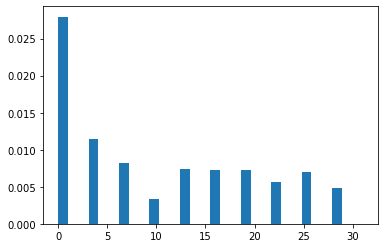

In [44]:
circ = read_circuit_file('./data/input.circuit')
qs = quantum_simulator_1(circ)
mgen = measure(qs)
mlist = []
for i in range(0, 100000):
    mlist.append(next(mgen))
draw_histogram(mlist)

Great! We've made a quantum simulator! But how efficient is it? For a $w$-qubit system, let $N = 2^w$ be the scale of our data. Then, we need a $O(N^2)$ space for the matrices we use throughout the algorithm. Also, suppose there are $g$ gates, each represented by a $O(N^2)$-sized matrix, then a single matrix multiplication will take $O(N^3)$ time. In total, the time complexity is $O(gN^3)$, which is a considerable amount if we plug $w$ in, resulting in a $O(g8^w)$ runtime.

The program will lag severely when our circuit grows. We need a better algorithm.

### State-to-State Transformation [🔝](#table-of-contents) <a name="state-to-state-transformation">

A quick improvement is to keep a state vector, and do multiplication on gate matrices and the vector instead of on the gate matrices themselves, this will likely improve the time complexity, since a $O(N^2)$-scale matrix and a $O(N)$-scale vector takes $O(N^2)$ to do multiplication, and thus it will be $O(gN^2)$, or $O(g4^w)$ in total. The implementation is as follows:

In [17]:
def quantum_simulator_2(circ, state=None):
    (w, gates) = circ
    limit = 2 ** w
    if state == None:
        state = [1] + [0 for i in range(0, limit - 1)]
    m = lambda s, w : None
    
    for g in gates:
        if g[0] == 'INITSTATE':
            state = initialize_state(g, w)
    for g in gates[::-1]:
        if g[0] == 'H':
            state = get_hadamard_matrix(g, w) @ state   
        elif g[0] == 'P':
            state = get_phase_matrix(g, w) @ state
        elif g[0] == 'CNOT':
            state = get_cnot_matrix(g, w) @ state
        elif g[0] == 'MEASURE':
            m = print_states
            
    # measure it now
    m(state, w)
    return state

The example is almost idential to the previous one, just using a different simulator.

In [46]:
circ = read_circuit_file('./data/input.circuit')
qs = quantum_simulator_2(circ)
mgen = measure(qs)
mlist = []
for i in range(0, 10):
    mlist.append(next(mgen))
print(mlist)

['00101', '00110', '00000', '01010', '00010', '00100', '10110', '11001', '00000', '01001']


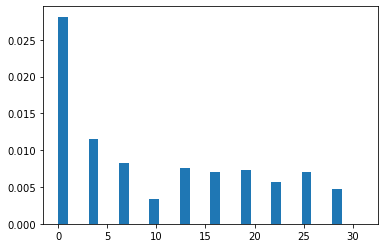

In [47]:
circ = read_circuit_file('./data/input.circuit')
qs = quantum_simulator_2(circ)
mgen = measure(qs)
mlist = []
for i in range(0, 100000):
    mlist.append(next(mgen))
draw_histogram(mlist)

### Sparse Matrix [🔝](#table-of-contents) <a name="sparse-matrix"></a>

You may already noticed that our extended gate matrices are composed of mostly zeros and a few non-zero entries. It is doubtless a waste to occupy $O(4^w)$ space to store a matrix; instead, we prefer a "compressed" form of matrix to save time and space resources, it's called a **sparse matrix**. For example, a matrix like the following:

$$
    \begin{bmatrix}
        1 & 0 & 0 & 0 & 2 \\
        3 & 0 & 4 & 0 & 0 \\
        0 & 3 & 0 & 0 & 0 \\
        0 & 0 & 2 & 1 & 0
    \end{bmatrix}
$$

can be described as the following lists:

```python
V = [1, 2, 3, 4, 3, 2, 1]
COL_INDEX = [0, 4, 0, 2, 1, 2, 3]
ROW_INDEX = [0, 2, 4, 5]
```

Here `V` is the list of non-zero entries sorted by row index and then by column index. `COL_INDEX` is the column indices of the non-zero entries, and `ROW_INDEX` is the first entry starting at corresponding row (e.g. the 4th entry (zero-indexed) starts at the 2nd row (zero-indexed), so `ROW_INDEX[2] = 4`). To access an entry at $i, j$, we can first slice `V` with `V[ROW_INDEX[i]:ROW_INDEX[i+1]]` to locate the row, and find appearance of $j$ within the slice. If it's found at `k`, the element we search for is `V[COL_INDEX[k]]`; otherwise, it is zero.

It's clear that there are only $O(N)$ non-zeros in our gate matrices, so the time and space complexity are both estimated $O(N)$.

The example above takes up 18 slots to store entries while the original matrix needs 20. This doesn't seem a big save. However, the scale of matrices grows exponetially in quantum circuits, so it will definitely be a sensible choice. We'll use `scipy.sparse` library to do this. We will start with the sparse version of our gate matrices:

In [152]:
# same as `kronecker_product` but the matrix is sparse
def kronecker_product_sparse(mat, i, k):
    result = sparse.csr_matrix([[1]])
    for j in range(1, i):
        result = sparse.kron(result, I2)
    result = sparse.kron(result, sparse.csr_matrix(mat))
    for j in range(i + 1, k + 1):
        result = sparse.kron(result, I2)
    return result

def hadamard_matrix_sparse(i, k):
    if k >= 14:
        print("The input is too large, expect to wait exponential time.")
    return kronecker_product_sparse(H, i, k);

def phase_matrix_sparse(theta, i, k):
    if k >= 14:
        print("The input is too large, expect to wait exponential time.")
    return kronecker_product_sparse(P(theta), i, k)

def cnot_matrix_sparse(ctrl, i, k):
    if ctrl + 1 == i:
        return kronecker_product_sparse(CNOT, ctrl, k-1)
    elif ctrl - 1 == i:
        return kronecker_product_sparse(TONC, i, k-1)
    else:
        print("We cannot do long-range CNOT so far.")
        return numpy.identity(2 ** k)

Notice that we simply substitute `sparse.kron` for `numpy.kron` and `sparse.matrix_csr` for `numpy.array`. The logic remains the same.

In [162]:
def get_hadamard_matrix_sparse(g, w):
    return hadamard_matrix_sparse(int(g[1]) + 1, w)

def get_phase_matrix_sparse(g, w):
    return phase_matrix_sparse(eval(str(g[2])), int(g[1]) + 1, w)  # eval() is to allow inputs like pi/3

def get_cnot_matrix_sparse(g, w):
    return cnot_matrix_sparse(int(g[1]) + 1, int(g[2]) + 1, w)

def quantum_simulator_3(circ, state=None):
    (w, gates) = circ
    limit = 2 ** w
    if state == None:
        state = sparse.csr_matrix([[1]] + [[0] for i in range(1, limit)])   # a column vector
    else:
        state = sparse.csr_matrix([list(state)]).transpose()
    m = lambda s, w : None
    
    for g in gates:
        if g[0] == 'INITSTATE':
            state = sparse.csr_matrix(numpy.array([initialize_state(g, w)]).transpose())
    for g in gates[::-1]:
        if g[0] == 'H':
            state = get_hadamard_matrix_sparse(g, w) @ state   
        elif g[0] == 'P':
            state = get_phase_matrix_sparse(g, w) @ state
        elif g[0] == 'CNOT':
            state = get_cnot_matrix_sparse(g, w) @ state
        elif g[0] == 'MEASURE':
            m = print_states
            
    # measure it now
    m(state.toarray(), w)
    return state.toarray().transpose()[0]

In [260]:
circ = read_circuit_file('./data/rand.circuit')
qs = quantum_simulator_3(circ)
mgen = measure(qs)
mlist = []
for i in range(0, 10):
    mlist.append(next(mgen))
print(mlist)

['00000', '11100', '10110', '00001', '10001', '10000', '10000', '01001', '01000', '10000']


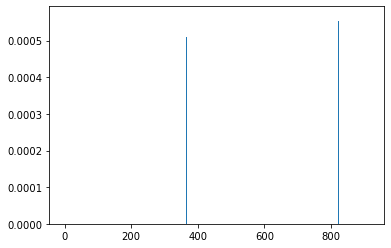

In [164]:
circ = read_circuit_file('./data/benchmark_dataset/11-16_4.circuit')
qs = quantum_simulator_3(circ)
mgen = measure(qs)
mlist = []
for i in range(0, 1000):
    mlist.append(next(mgen))
draw_histogram(mlist)

00000 : (0.03409461975165978+0j); 
00001 : (0.014675527864780113+0j); 00010 : (0.04797257787014851+0j); 00011 : (0.0015344333324749193+0j); 00100 : (0.013915241797331251+0j); 
00101 : (0.004043865411763237+0j); 00110 : (0.007267574455252521+0j); 00111 : (0.0002670388164266022+0j); 01000 : (0.213149685470434+0j); 
01001 : (0.09263850269053603+0j); 01010 : (0.015210162105033263+0j); 01011 : (0.0014685822096425231+0j); 01100 : (0.02324513050569639+0j); 
01101 : (0.012382081775642859+0j); 01110 : (0.017759676684420585+0j); 01111 : (0.0003752992587550381+0j); 10000 : (0.15864560117464313+0j); 
10001 : (0.06804483636621782+0j); 10010 : (0.018985285248662158+0j); 10011 : (0.0006845025266099832+0j); 10100 : (0.04159888288072051+0j); 
10101 : (0.01740804965806713+0j); 10110 : (0.01650516504968562+0j); 10111 : (8.295350571212806e-05+0j); 11000 : (0.07152752240958493+0j); 
11001 : (0.029185819093328156+0j); 11010 : (0.03881443743669522+0j); 11011 : (0.002718369012729408+0j); 11100 : (0.0097785621

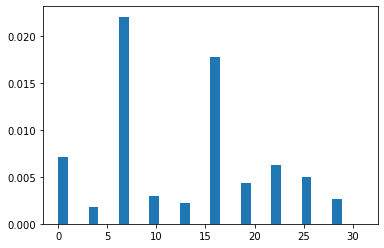

In [165]:
circ = read_circuit_file('./data/measure.circuit')
qs = quantum_simulator_1(circ)
mgen = measure(qs)
mlist = []
for i in range(0, 100000):
    mlist.append(next(mgen))
draw_histogram(mlist)

### No Matrix [🔝](#table-of-contents) <a name="no-matrix"></a>

Matrices are costly in calculation. What if we don't use matrices at all? Recall that we have the dirac notation for a quantum state and its python implementation. Instead of manipulating matrices and vectors, we can modify the initial states according to the gates we have.

In [258]:
def hadamard_transform(state, i, k=len(state[0][1])):
    # a|0> + b|1> = (a+b)/sqrt(2)|0> + (a-b)/sqrt(2)|1>
    def new_state(s, i):
        pass
        
    tmp = [new_state(s, i) for s in state]
    return [s for i, s in enumerate(tmp) if s not in tmp[:i]]

def phase_transform(state, i, k=len(state[0][1])):
    pass

def cnot_transform(state, i, k=len(state[0][1])):
    pass

### Performance Comparison

To show the performance differences between the discussed three simulators, let's do a benchmark. We'll generate fixed number of quantum gates for $w$-qubit systems, where $w$ grows from $2$ (so that CNOT won't be excluded) to some relatively large number, say $20$ (note that here it has exceeded $8^{20} \approx 1\times 10^{18}$ units of time for the first simulator). To run this benchmark, let's first write a random gate generator:

In [20]:
def random_gate_text(w):
    gate = random.randint(3)
    arg = random.randint(w)
    if gate == 0:
        return 'H ' + str(arg)
    elif gate == 1:
        theta = random.rand() * 2 * pi
        return 'P ' + str(arg) + ' ' + str(theta)
    elif gate == 2:
        # So far we can only deal with CNOT gates whose control and target wires are adjacent
        return 'CNOT ' + str(arg) + ' ' + str(arg + 1 if arg != w - 1 else arg - 1)
    
def random_circuit_text(w, ct):
    result = 'QC ' + str(w) + '\n'
    result += 'INITSTATE BASIS |' + '0'*w + '>\n'
    for i in range(0, ct):
        result += random_gate_text(w) + '\n'
    return result

def write_circuit_file(file_name, circ_text):
    f = open(file_name, "w")
    f.write(circ_text)
    f.close()
    
def generate_circuit_files(bit_ct, gate_ct, test_ct):
    for i in range(0, test_ct):
        write_circuit_file('./data/benchmark_dataset/'+str(bit_ct)+'-'+str(gate_ct)+'_'+str(i)+'.circuit', random_circuit_text(bit_ct, gate_ct))
        i += 1

Let's first generate the circuit files:

In [35]:
%%time
for qubit_ct in range(1, 21):
    for gate_ct in range(10, 20):
        generate_circuit_files(qubit_ct, gate_ct, 10)

Wall time: 726 ms


In [21]:
def get_interval(t=None):
    if t == None:
        return time.perf_counter()
    return time.perf_counter() - t

In [140]:
%%time
record_1 = [-1 for i in range(1, 21)]
record_2 = [-1 for i in range(1, 21)]
record_3 = [-1 for i in range(1, 21)]

for bit_ct in range(2, 15):
    tmp_1 = tmp_2 = tmp_3 = 0
    print('bit: ' + str(bit_ct))
    for gate_ct in range(19, 20):
        for test_ct in range(0, 1):
            circ = read_circuit_file('./data/benchmark_dataset/'+str(bit_ct)+'-'+str(gate_ct)+'_'+str(test_ct)+'.circuit')
            t = get_interval()
            if bit_ct <= 12:
                quantum_simulator_1(circ)
                tmp_1 += get_interval(t)
                t = get_interval()
            if bit_ct <= 13:
                quantum_simulator_2(circ)
                tmp_2 += get_interval(t)
                t = get_interval()
            quantum_simulator_3(circ)
            tmp_3 += get_interval(t)
    record_1[bit_ct] = tmp_1
    record_2[bit_ct] = tmp_2
    record_3[bit_ct] = tmp_3

bit: 2
bit: 3
bit: 4
bit: 5
bit: 6
bit: 7
bit: 8
bit: 9
bit: 10
bit: 11
bit: 12
bit: 13
bit: 14
The input is too large, expect to wait exponential time.
The input is too large, expect to wait exponential time.
The input is too large, expect to wait exponential time.
The input is too large, expect to wait exponential time.
The input is too large, expect to wait exponential time.
The input is too large, expect to wait exponential time.
The input is too large, expect to wait exponential time.
The input is too large, expect to wait exponential time.
The input is too large, expect to wait exponential time.
The input is too large, expect to wait exponential time.
The input is too large, expect to wait exponential time.
Wall time: 4min 49s


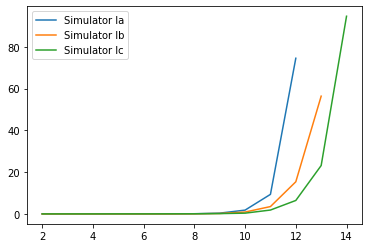

In [142]:
x = [i for i in range(2, 15)]
plt.plot(x[0:11], record_1[2:13])
plt.plot(x[0:12], record_2[2:14])
plt.plot(x, record_3[2:15])
plt.legend(['Simulator Ia', 'Simulator Ib', 'Simulator Ic'])
plt.show()

## Non-atomic Gates [🔝](#table-of-contents) <a name="non-atomic-gates"></a>

Merely three gates cannot build a powerful quantum machine. We need more gates to express the logic in the circuits. Of course, they are constructed with our universal gate set, i.e. the Hadamard gate, the phase shift gate, and the CNOT gate. Here are a miscellaneous collection of the gates we may be interested.

### Pauli Gates [🔝](#table-of-contents) <a name="pauli-gates"></a>

Here's our old friend back in classical circuits. An NOT gate does is defined as follows:

$$
    |0\rangle \mapsto |1\rangle \qquad |1\rangle \to |0\rangle
$$

The matrix for an NOT gate is:

$$
    X = 
    \begin{bmatrix}
        0 & 1 \\ 1 & 0
    \end{bmatrix}
$$

It's also known as the **Pauli-X gate**. We can derive it from the Hadamard gate and phase shift gate: $X = HP(\pi)H$ (this can be easily confirmed). Here, the $P(\pi)$ matrix represents the **Pauli-Z gate** defined as follows:

$$
    |0\rangle \mapsto |0\rangle \qquad |1\rangle \mapsto -|1\rangle
$$

whose matrix definition is:

$$
    Z = 
    \begin{bmatrix}
        1 & 0 \\ 0 & -1
    \end{bmatrix}
$$

Of course, there should be one other **Pauli-Y gate**. You could have noticed that the Pauli-X and Pauli-Y gates may perform on some symmetries. It may be helpful to introduce the **Bloch sphere**, a geometric representation of a two-level quantum mechanical system, which is exactly the $1$-qubit scenario we've been talking about.

<img src="./images/bloch_sphere.png" width=200 height=200>

This is a unit sphere whose axes represents the following states:

$$
    \begin{align*}
    \begin{cases}
        \hat{\mathbf{x}} &= \quad |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
        -\hat{\mathbf{x}} &= \quad |-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) 
    \end{cases}
    &&
    \begin{cases}
        \hat{\mathbf{y}} &= \quad |i+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle) \\
        -\hat{\mathbf{y}} &= \quad |i-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)   
    \end{cases}
    &&
    \begin{cases}
        \hat{\mathbf{z}} &= \quad |0\rangle \\\\
        -\hat{\mathbf{z}} &= \quad |1\rangle
    \end{cases}
    \end{align*}
$$

It might be tricky to find out what these axes really means from above, but we can get some insights from the general form of a $1$-qubit quantum state $|\Psi\rangle$:

$$
    |\Psi\rangle = \cos\frac{\theta}{2}|0\rangle + e^{i\varphi}\sin\frac{\theta}{2}|1\rangle
$$

Then, the Pauli-X transformation is simply rotate $\Psi$ around the $x$ axis of the Bloch sphere by $\pi$. The Pauli-Z transformation makes $\Psi$ rotate around the $z$ axis by $\pi$. We can easily check them:

$$
    \begin{align*}
        \Psi_{x, \pi} &= \cos\frac{\pi - \theta}{2}|0\rangle + e^{i\varphi}\sin\frac{\pi - \theta}{2}|1\rangle \\
        &= \sin\frac{\theta}{2}|0\rangle + e^{i\varphi}\cos\frac{\theta}{2}|1\rangle \\
        &= \cos\frac{\theta}{2}|1\rangle + e^{-i\varphi}\sin\frac{\theta}{2}|0\rangle \tag{Adjust the phase}\\
        \Psi_{z, \pi} &= \cos\frac{\theta}{2}|0\rangle + e^{i(\pi + \varphi)}\sin\frac{\theta}{2}|1\rangle \\
        &= \cos\frac{\theta}{2}|0\rangle - e^{i\varphi}\sin\frac{\theta}{2}|1\rangle \tag{Adjust the phase}
    \end{align*}
$$

Thus, it's natural to introduce the Pauli-Y tranformation as rotating around the $y$ axis by $\pi$:

$$
    \begin{align*}
        \Psi_{y, \pi} &= \cos\frac{\pi - \theta}{2}|0\rangle + e^{i(\pi - \varphi)}\sin\frac{\pi - \theta}{2}|1\rangle \\
        &= \sin\frac{\theta}{2}|0\rangle - e^{-i\varphi}\cos\frac{\theta}{2}|1\rangle \\
        &= -\cos\frac{\theta}{2}|1\rangle + e^{i\varphi}\sin\frac{\theta}{2}|0\rangle \tag{Adjust the phase}\\
        &= \cos\frac{\theta}{2}|1\rangle - ie^{i\varphi}\sin\frac{\theta}{2}|0\rangle \tag{Adjust the phase}
    \end{align*}
$$

This gives us a definition of the Pauli-Y gate:

$$
    |0\rangle \mapsto i|1\rangle \qquad |1\rangle \mapsto -i|0\rangle
$$

whose matrix representation is:

$$
    Y = 
    \begin{bmatrix}
        0 & -i \\ i & 0
    \end{bmatrix}
$$

Note that it's only a matter of phase when choosing the definition of Pauli-Y transformation, but the adopted version has more algebraic properties than the real matrix:

$$
    Y_\text{real} =
    \begin{bmatrix}
        0 & - 1 \\ 1 & 0
    \end{bmatrix}
$$

since the complex one generates the [**Pauli Group**](https://en.wikipedia.org/wiki/Pauli_group) together with the Pauli-X and Pauli-Z, which we'd prefer not to elaborate here.

Finally, it's not hard to verify the following properties with repect to the Pauli gates:

$$
    X^2 = Y^2 = Z^2 = -iXYZ = I
$$

The Pauli gates built from the existing gates are illustrated as follows:

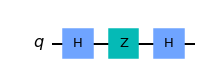

In [49]:
draw_pauli_x_gate()

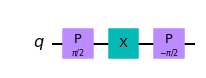

In [50]:
draw_pauli_y_gate()

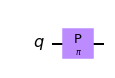

In [51]:
draw_pauli_z_gate()

In [22]:
# to avoid numerical error, I prefer to use the direct definition here
X = numpy.array([[0, 1], [1, 0]])        # X = H @ Z @ H
Y = numpy.array([[0, -1j], [1j, 0]])     # Y = P(pi/2) @ X @ P(-pi/2)
Z = numpy.array([[1, 0], [0, -1]])       # Z = P(pi)

### Rotation Operator Gates [🔝](#table-of-contents) <a name="rotation-operator-gates"></a>

A more general form of the Pauli gates is to rotate around the axes of the Bloch sphere by *any* angle. The definition is:

$$
    R_x(\theta) = e^{-i\frac{\theta}{2}X} \qquad R_y(\theta) = e^{-i\frac{\theta}{2}Y} \qquad R_z(\theta) = e^{-i\frac{\theta}{2}Z}
$$

Here the notation $e^{i\theta A}$ where the matrix appears at the exponent is defined as:

$$
    \begin{align*}
        e^{i\theta A}
        &= \sum_{n=0}^\infty \frac{1}{n!}(i\theta A)^n \\
        &= \sum_{n=0}^\infty \frac{(-1)^n}{(2n)!}(\theta A)^{2n} + i\sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}(\theta A)^{2n+1} \tag{Here we use the fact that $A^2 = I$} \\
        &= I\cos\theta + iA\sin\theta
    \end{align*}
$$

Thus, the more detailed definition is:

$$
    R_x(\theta) =
    \begin{bmatrix}
        \cos\tfrac{\theta}{2} & -i\sin\tfrac{\theta}{2} \\
        -i\sin\tfrac{\theta}{2} & \cos\tfrac{\theta}{2}
    \end{bmatrix}
    \qquad
    R_y(\theta) = 
    \begin{bmatrix}
        \cos\frac{\theta}{2} & -\sin\frac{\theta}{2} \\
        \sin\frac{\theta}{2} & \cos\frac{\theta}{2}
    \end{bmatrix}
    \qquad
    R_z(\theta) = 
    \begin{bmatrix}
        e^{-i\frac{\theta}{2}} & 0 \\
        0 & e^{i\frac{\theta}{2}}
    \end{bmatrix}
$$

Again, we need to find some way to construct these matrices from the ones we have ($H$, $P$, $X$, etc.). I do this quite randomly, but I'd like to share some thoughts on the direction I take. This is probably not the most efficient way, but it's how I figure it out.

First, I believe the three rotation matrices are somehow symmetric, so it should be easy to obtain the other two once I figure out $R_x$. Then, I decide to start from the rotation matrix, and try to map it to a familiar matrix. I notice that $R_x$ has separated $\cos$ and $\sin$ entries, which is annoying since we don't seemingly have any matrices to eliminate a single trignometric function. An idea is to use $H$ to add $\cos$ and $\sin$ terms together and transform it into exponential form, which can be dealt with phase shift matrix then:

$$
    \begin{align*}
        R_xH &= 
        \begin{bmatrix}
            \cos\frac{\theta}{2} & -i\sin\frac{\theta}{2} \\
            -i\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
        \end{bmatrix}
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            1 & 1 \\ 1 & -1
        \end{bmatrix} \\
        &= 
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            e^{-i\frac{\theta}{2}} & e^{i\frac{\theta}{2}} \\
            e^{-i\frac{\theta}{2}} & -e^{i\frac{\theta}{2}}
        \end{bmatrix}
    \end{align*}
$$

Then apply the $P(-i\theta/2)$ to the right:

$$
    \begin{align*}
        R_xHP(-i\frac{\theta}{2})
        &=
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            e^{-i\frac{\theta}{2}} & e^{i\frac{\theta}{2}} \\
            e^{-i\frac{\theta}{2}} & -e^{i\frac{\theta}{2}}
        \end{bmatrix}
        \begin{bmatrix}
            1 & 0 \\ 0 & e^{-i\frac{\theta}{2}}
        \end{bmatrix} \\
        &= 
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            e^{-i\frac{\theta}{2}} & 1 \\
            e^{-i\frac{\theta}{2}} & -1
        \end{bmatrix}
    \end{align*}
$$

It seems that we eliminate a pair of $e^{i\theta/2}$ using the phase shift matrix. Now it's time to eliminate the other pair. We'd want to flip the two columns first, with the Pauli-X matrix:

$$
    \begin{align*}
        R_XHP(-\frac{\theta}{2})XP(\frac{\theta}{2})
        &= 
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            e^{-i\frac{\theta}{2}} & 1 \\
            e^{-i\frac{\theta}{2}} & -1
        \end{bmatrix}    
        \begin{bmatrix}
            0 & 1 \\ 1 & 0
        \end{bmatrix}
        \begin{bmatrix}
            1 & 0 \\ 0 & e^{i\frac{\theta}{2}}
        \end{bmatrix} \\
        &= 
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            1 & e^{-i\frac{\theta}{2}} \\
            -1 & e^{-i\frac{\theta}{2}}
        \end{bmatrix}
        \begin{bmatrix}
            1 & 0 \\ 0 & e^{i\frac{\theta}{2}}
        \end{bmatrix} \\
        &= 
        \frac{1}{\sqrt{2}}
        \begin{bmatrix}
            1 & 1 \\
            -1 & 1
        \end{bmatrix}
    \end{align*}
$$

I find this matrix resembles the Hadamard matrix a lot. In fact, they only differ by a Pauli-X transformation. Hereby, we make it to the end of the chain:

$$
    R_x(\theta)HP(-\frac{\theta}{2})XP(\frac{\theta}{2})XH \equiv I \tag{*}
$$

Now, to get a formula for $R_X$, we just multiply the inverse matrices to the right of both sides. Thankfully these matrices are either **involutary** or conceptually easy to inverse (like the phase shift matrix):

$$
    R_x(\theta) = HXP(-\frac{\theta}{2})XP(\frac{\theta}{2})H
$$

Finally, we need to expand the definition of $X$ and get rid of redundant matrices:

$$
    \begin{align*}
        R_x(\theta) &= H(HZH)P(-\frac{\theta}{2})(HZH)P(\frac{\theta}{2})H \\
        &= P(\pi)HP(-\frac{\theta}{2})HP(\pi)HP(\frac{\theta}{2})H
    \end{align*}
$$

The other two rotation matrices don't come so straight. I tried to replace $X$ in $(*)$ by $Y$ or $Z$, but there's no luck (the result is not identity). The good news is that I already found the pattern:

- If $\cos$ and $\sin$ are separated, use Hadamard to reunite them into $\exp$.
- Use $X$ to swap the two columns.
- Use $P(\theta)$ to phase shift the right column, in some case resulting in $1$'s.

$$
    \begin{align*}
        R_y(\theta)HP(-\frac{\theta}{2})YP(\frac{\theta}{2})YH
        &=
        \begin{bmatrix}
            -i & 0 \\ 0 & i
        \end{bmatrix} \\
        R_z(\theta)HP(-\frac{\theta}{2})ZP(\frac{\theta}{2})ZH
        &=
        \begin{bmatrix}
            0 & 1 \\ -1 & 0
        \end{bmatrix}
    \end{align*}
$$

After commiting some efforts, I get the following:

$$
    \begin{align*}
        R_y &= P\left(\frac{\pi}{2}\right)HP\left(-\frac{\theta}{2}\right)XP\left(\frac{\theta}{2}\right)HP\left(-\frac{\pi}{2}\right) \\
        &= P\left(\frac{\pi}{2}\right)HP\left(-\frac{\theta}{2}\right)HP(\pi)HP\left(\frac{\theta}{2}\right)HP\left(-\frac{\pi}{2}\right) \\
        R_z &= P\left(\frac{\theta}{2}\right)XP\left(-\frac{\theta}{2}\right)X \\
        &= P\left(\frac{\theta}{2}\right)HP(\pi)HP\left(-\frac{\theta}{2}\right)HP(\pi)H
    \end{align*}
$$

The rotation operator gates built from the existing gates are illustrated as follows:

In [42]:
# draw_rotation_x_gate()

In [43]:
# draw_rotation_y_gate()

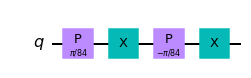

In [430]:
# draw_rotation_z_gate()
qc = QuantumCircuit(1)
theta = pi/42
qc.p(theta/2, 0)
qc.x(0)
qc.p(-theta/2, 0)
qc.x(0)
qc.draw(output='mpl')

And also, it can be faster if we construct them directly:

In [23]:
def RX(theta):
    arg = theta / 2
    return numpy.array([[numpy.cos(arg), -1j * numpy.sin(arg)], [-1j * numpy.sin(arg), numpy.cos(arg)]])
def RY(theta):
    arg = theta / 2
    return numpy.array([[numpy.cos(arg), -numpy.sin(arg)], [numpy.sin(arg), numpy.cos(arg)]])
def RZ(theta):
    arg = theta / 2
    return numpy.array([[e ** (-1j * arg), 0], [0, e ** (1j * arg)]])

### Swap Gate [🔝](#table-of-contents) <a name="swap-gate"></a>

Before we move on to controlled phase gates, there's an important gate to mention, that is the **swap gate**. It operates on two qubits with the following effect:

$$
    |00\rangle \mapsto |00\rangle \qquad |01\rangle \mapsto |10\rangle \qquad |10\rangle \mapsto |01\rangle \qquad |11\rangle \mapsto |11\rangle
$$

Its matrix form is:

$$
    \text{SWAP} = 
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1
    \end{bmatrix}
$$

Recall the alternative interpretation of the CNOT gate, that it does the **XOR** operation on the control and target qubits and stores the result in the target qubit while preserving the control qubit. There is actually a trick to swap two integers with XOR:

```python
x = x ^ y
y = x ^ y
x = x ^ y
```
In each statement, there's one variable modified and the other preserved, just like the CNOT transformation. Thus, we can get the following matrix:

$$
    \text{SWAP}(i, j) = \text{CNOT}(i, j)\ \text{CNOT}(j, i)\ \text{CNOT}(i, j)
$$

We still haven't resolved the "long-ranged" CNOT problem (we will talk about it very soon), so let's stick to adjacent swap first. The matrix is defined in python as follows:

In [24]:
SWAP = CNOT @ TONC @ CNOT

Swap gates are extremely helpful when it comes to multi-qubit matrix construction. Recall the issue that we cannot discover a good way to calculate $CNOT(c, i, k)$, where $c$ is the control qubit, $i$ is the target qubit, and $k$ is the count of qubits. Now that we have the SWAP gate, we swap qubit by qubit until the control and target are adjacent; then we swap it way back to the initial place. For example, look at the following circuit:

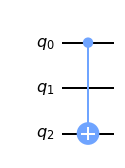

In [56]:
qc = QuantumCircuit(3)
qc.cx(0, 2)
qc.draw(output='mpl')

It's equivalent to the following circuit:

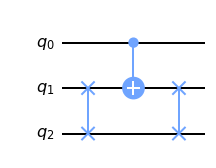

In [133]:
qc = QuantumCircuit(3)
qc.swap(1, 2)
qc.cx(0, 1)
qc.swap(1, 2)
qc.draw(output='mpl')

We first write the extended swap matrix:

In [25]:
# swap the i-th and (i+1)-th qubit
def swap_adjacent(i, k):
    return kronecker_product(SWAP, i, k-1)

def swap_matrix(i, j, k):
    lo = min(i, j)
    hi = max(i, j)
    result = numpy.identity(2 ** k)
    for i in range(lo, hi - 1):
        result = swap_adjacent(i, k) @ result
    for i in range(hi - 1, lo - 1, -1):
        result = swap_adjacent(i, k) @ result
    return result

def swap_adjacent_sparse(i, k):
    return kronecker_product_sparse(SWAP, i, k-1)

def swap_matrix(i, j, k):
    lo = min(i, j)
    hi = max(i, j)
    result = sparse.identity(2 ** k)
    for i in range(lo, hi - 1):
        result = swap_adjacent_sparse(i, k) @ result
    for i in range(hi - 1, lo - 1, -1):
        result = swap_adjacent_sparse(i, k) @ result
    return result

Let's then implement the complete version of `cnot_matrix`:

In [26]:
def cnot_matrix(ctrl, i, k):
    assert ctrl in range(1, k + 1)
    assert i in range(1, k + 1)
    assert ctrl != i
    
    lo = min(ctrl, i)
    hi = max(ctrl, i)
    result = numpy.identity(2 ** k)
    
    for j in range(lo, hi - 1):
        result = swap_adjacent(j, k) @ result
    result = kronecker_product(CNOT if lo == ctrl else TONC, hi - 1, k - 1)
    for j in range(hi - 1, lo, -1):
        result = swap_adjacent(j, k) @ result
    return result

def cnot_matrix_sparse(ctrl, i, k):
    assert ctrl in range(1, k + 1)
    assert i in range(1, k + 1)
    assert ctrl != i
    
    lo = min(ctrl, i)
    hi = max(ctrl, i)
    result = sparse.identity(2 ** k)
    
    for j in range(lo, hi - 1):
        result = swap_adjacent_sparse(j, k) @ result
    result = kronecker_product_sparse(CNOT if lo == ctrl else TONC, hi - 1, k - 1)
    for j in range(hi - 1, lo, -1):
        result = swap_adjacent_sparse(j, k) @ result
    return result

In [136]:
sparse.identity(2)

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements (1 diagonals) in DIAgonal format>

### Controlled Rotation Gates

With our fully implemented CNOT gate, we can add more gates that we can control on. The **controlled rotation gates** are the rotation operator gates controlled by an extra qubit. We can easily write down their definition as follows:

$$
    \begin{align*}
        \text{CR}_x(\theta)
        = \begin{bmatrix}
            1 & 0 & 0 & 0 \\
            0 & 1 & 0 & 0 \\
            0 & 0 & \cos\tfrac{\theta}{2} & -i\sin\tfrac{\theta}{2} \\
            0 & 0 & -i\sin\tfrac{\theta}{2} & \cos\tfrac{\theta}{2}
        \end{bmatrix}
        \qquad
        \text{CR}_y(\theta)
        = \begin{bmatrix}
            1 & 0 & 0 & 0 \\
            0 & 1 & 0 & 0 \\
            0 & 0 & \cos\frac{\theta}{2} & -\sin\frac{\theta}{2} \\
            0 & 0 & \sin\frac{\theta}{2} & \cos\frac{\theta}{2}
        \end{bmatrix}
        \qquad
        \text{CR}_z(\theta)
        = \begin{bmatrix}
            1 & 0 & 0 & 0 \\
            0 & 1 & 0 & 0 \\
            0 & 0 & e^{-i\frac{\theta}{2}} & 0 \\
            0 & 0 & 0 & e^{i\frac{\theta}{2}}
        \end{bmatrix}
    \end{align*}
$$

It's unlikely to decompose these matrices to universal matrices manually (it's 4x4, so there's a lot more work), so let's get some inspiration from the "uncontrolled" matrices. Let's try $\text{CR}_x$ first. Recall that $R_x = HXP(-\frac{\theta}{2})XP(\frac{\theta}{2})H$; if the Pauli-X gates in the middle are reset to identity matrices, the result matrix will also be an identity. Thus, if we can somehow control $X$ to be identity when we want, we can then control $\text{CR}_x$ to be identity at the same time. Fortunately that's what $\text{CNOT}$ is designed to do ($\text{NOT}$ is an alias for $X$). The following definition explains the trick:

$$
    \text{CR}_x = (I\otimes H)\ \text{CNOT}\ \left(I \otimes P\left(-\frac{\theta}{2}\right)\right)\ \text{CNOT} \left(I \otimes P\left(\frac{\theta}{2}\right)\right)
$$

It should be even easier to grab the idea with a circuit diagram:

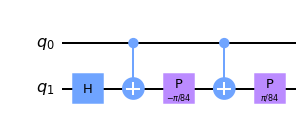

In [60]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cnot(0, 1)
qc.p(-pi/84, 1)
qc.cnot(0, 1)
qc.p(pi/84, 1)
qc.draw(output='mpl')

With the same spirit, we can get the definition of $\text{CR}_y$ and $\text{CR}_z$ as well:

$$
    \begin{align*}
        \text{CR}_y(\theta)
        &= \left(I\otimes P\left(\frac{\pi}{2}\right)\right)
        (I \otimes H)
        \left(I \otimes P\left(-\frac{\theta}{2}\right)\right)
        \ \text{CNOT}\ 
        \left(I \otimes P\left(\frac{\theta}{2}\right)\right)
        (I \otimes H)
        \left(I\otimes P\left(-\frac{\pi}{2}\right)\right) \\
        \text{CR}_z(\theta)
        &= \left(I \otimes P\left(\frac{\theta}{2}\right)\right)
        \ \text{CNOT}\
        \left(I \otimes P\left(-\frac{\theta}{2}\right)\right)
        \ \text{CNOT}
    \end{align*}
$$

Well, it's unpleasant to see those excessive $I$ and kronecker symbols, so I'd like to show the circuit diagrams as well:

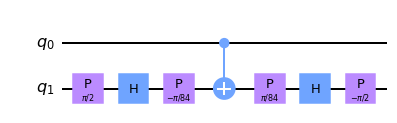

In [61]:
qc = QuantumCircuit(2)
qc.p(pi/2, 1)
qc.h(1)
qc.p(-pi/84, 1)
qc.cnot(0, 1)
qc.p(pi/84, 1)
qc.h(1)
qc.p(-pi/2, 1)
qc.draw(output='mpl')

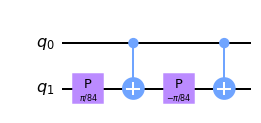

In [62]:
qc = QuantumCircuit(2)
qc.p(pi/84, 1)
qc.cnot(0, 1)
qc.p(-pi/84, 1)
qc.cnot(0, 1)
qc.draw(output='mpl')

### Controlled Phase Shift Gate [🔝](#table-of-contents) <a name="controlled-phase-shift-gate"></a>

Now, we want to implement a phase gate with a control qubit. It's similar to the CNOT gate, but perform phase shift transformation instead of the NOT operation:

$$
    |00\rangle \mapsto |00\rangle \qquad |01\rangle \mapsto |01\rangle \qquad |10\rangle \mapsto |10\rangle \qquad |11\rangle \mapsto e^{i\theta}|11\rangle
$$

whose matrix representation is:

$$
    \text{CPHASE}(\theta) = 
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & e^{i\theta}
    \end{bmatrix}
$$

This can be achieved by adding a phase shift gate on the control wire before an $\text{CR}_z$ gate:

$$
    \begin{align*}
       \text{CPHASE}(\theta) = 
        &= \left(P\left(\frac{\theta}{2}\right)\otimes I\right) \left(I \otimes P\left(\frac{\theta}{2}\right)\right) \ \text{CNOT}\ \left(I \otimes P\left(-\frac{\theta}{2}\right)\right) \ \text{CNOT} \\
    \end{align*}
$$

The circuit diagram is as follows:

In [63]:
theta = pi/8
print(kron(P(theta/2), I2) @ kron(I2, P(theta/2)) @ CNOT @ kron(I2, P(-theta/2)) @ CNOT)
P(pi/8)

[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         1.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         1.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.92387953+0.38268343j]]


array([[1.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.92387953+0.38268343j]])

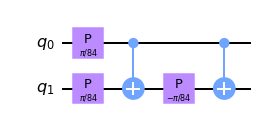

In [64]:
qc = QuantumCircuit(2)
theta = pi/42
qc.p(theta/2, 0)
qc.p(theta/2, 1)
qc.cnot(0, 1)
qc.p(-theta/2, 1)
qc.cnot(0, 1)
qc.draw(output='mpl')

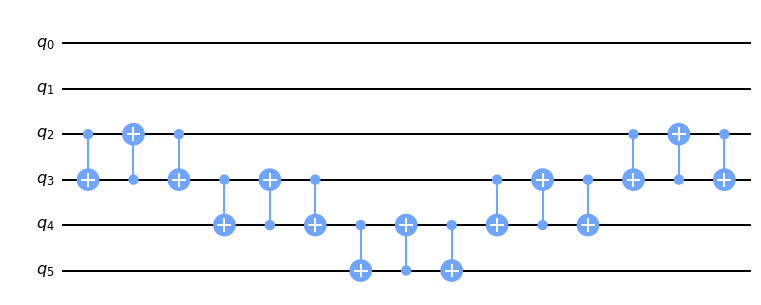

In [65]:
qc = QuantumCircuit(6)
qc.cnot(2, 3)
qc.cnot(3, 2)
qc.cnot(2, 3)
qc.cnot(3, 4)
qc.cnot(4, 3)
qc.cnot(3, 4)
qc.cnot(4, 5)
qc.cnot(5, 4)
qc.cnot(4, 5)
qc.cnot(3, 4)
qc.cnot(4, 3)
qc.cnot(3, 4)
qc.cnot(2, 3)
qc.cnot(3, 2)
qc.cnot(2, 3)
qc.draw(output='mpl')

Now we are done with the non-atomic gates! To enable them in the circuits, we would like to write some precompiling tools to convert the gates to those in the universal gate set (i.e. the Hadamard, phase shift, and CNOT gates):

In [27]:
def convert_pauli_x(i):
    return [
        ['H', i],
        ['P', i, pi],
        ['H', i]
    ]

def convert_pauli_y(i):
    return [
        ['P', i, pi/2],
        *convert_pauli_x(i),
        ['P', i, -pi/2]
    ]

def convert_pauli_z(i):
    return [
        ['P', i, pi]
    ]

def convert_rotation_x(theta, i):
    arg = theta / 2
    return [
        ['H', i],
        *convert_pauli_x(i),
        ['P', i, -arg],
        *convert_pauli_x(i),
        ['P', i, arg],
        ['H', i]
    ]

def convert_rotation_y(theta, i):
    arg = theta / 2
    return [
        ['P', i, pi/2],
        ['H', i],
        ['P', i, -arg],
        *convert_pauli_x(i),
        ['P', i, arg],
        ['H', i],
        ['P', i, -pi/2]
    ]

def convert_rotation_z(theta, i):
    arg = theta / 2
    return [
        ['P', i, arg],
        *convert_pauli_x(i),
        ['P', i, -arg],
        *convert_pauli_x(i)
    ]

# we use swap to implement long-range CNOT under the hood (I've coded that in python)
# in real quantum computers, CNOT is more fundamental, so let's suppose the following can be done atomically
def convert_swap(i, j):
    return [
        ['CNOT', i, j],
        ['CNOT', j, i],
        ['CNOT', i, j]
    ]

def convert_controlled_rotation_x(theta, ctrl, i):
    arg = theta / 2
    return [
        ['H', i],
        ['CNOT', ctrl, i],
        ['P', i, -arg],
        ['CNOT', ctrl, i],
        ['P', i, arg],
    ]

def convert_controlled_rotation_y(theta, ctrl, i):
    arg = theta / 2
    return [
        ['P', i, pi/2],
        ['H', i],
        ['P', i, -arg],
        ['CNOT', ctrl, i],
        ['P', i, arg],
        ['P', i, -pi/2]
    ]

def convert_controlled_rotation_z(theta, ctrl, i):
    arg = theta / 2
    return [
        ['P', i, arg],
        ['CNOT', ctrl, i],
        ['P', i, -arg],
        ['CNOT', ctrl, i]
    ]

def convert_controlled_phase(theta, ctrl, i):
    arg = theta / 2
    return [
        ['P', ctrl, arg],
        *convert_controlled_rotation_z(theta, ctrl, i)
    ]

def precompile(code):
    def translate(gate):
        name = gate[0]
        arg1 = gate[1]
        if name == 'X':
            return convert_pauli_x(arg1)
        elif name == 'Y':
            return convert_pauli_y(arg1)
        elif name == 'Z':
            return convert_pauli_z(arg1)
        elif name == 'RX':
            return convert_rotation_x(eval(gate[2]), arg1)
        elif name == 'RY':
            return convert_rotation_y(eval(gate[2]), arg1)
        elif name == 'RZ':
            return convert_rotation_z(eval(gate[2]), arg1)
        elif name == 'SWAP':
            return convert_swap(arg1, gate[2])
        elif name == 'CRX':
            return convert_controlled_rotation_x(eval(gate[3]), arg1, gate[2])
        elif name == 'CRY':
            return convert_controlled_rotation_y(eval(gate[3]), arg1, gate[2])
        elif name == 'CRZ':
            return convert_controlled_rotation_z(eval(gate[3]), arg1, gate[2])
        elif name == 'CPHASE':
            return convert_controlled_phase(eval(gate[3]), arg1, gate[2])
        else:
            return [gate]
    
    return flatten([translate(gate) for gate in code])

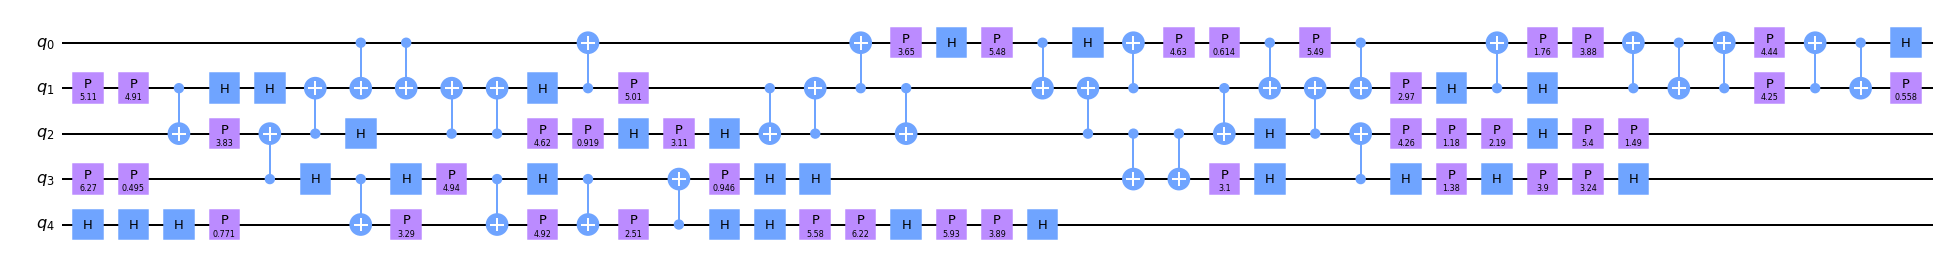

In [143]:
circ = read_circuit_file('./data/rand.circuit')
draw_qcircuit(circ)

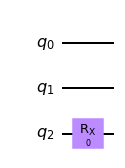

In [128]:
qc = QuantumCircuit(3)
qc.rx(0, 2)
qc.draw(output='mpl')

## Phase Estimation [🔝](#table-of-contents) <a name="phase-estimation"></a>

### Introduction [🔝](#table-of-contents) <a name="introduction"></a>

From now on, we'll aim at implementing an efficient algorithm with a quantum computer. It is still slow, though, with a quantum simulator; but if we do have a quantum computer, it will be boosted exponentially. It's called the **Shor's algorithm**, which is design for factoring numbers. We will get to that at last. For now, we'll focus on a sub-algorithm, **phase estimation**, of the Shor's Algorithm, which is also the critical part where the quantum computer helps the most.

Recall that we can use a unitary matrix $U$ to represent a quantum circuit. Suppose $\lambda$ is its eigenvalue, namely:

$$
    U|\Psi\rangle = \lambda|\Psi\rangle  \tag{*}
$$

for some eigenvector $\Psi$, then also we have:

$$
    \langle \Psi|U^\dagger = \langle\Psi|\lambda^* \tag{**}
$$

where $\lambda^*$ is the complex conjugate of $\lambda$. $(*)$ and $(**)$ lead to

$$
    \langle\Psi|\Psi\rangle = \langle U^\dagger U\rangle = \langle \lambda^*\lambda\rangle = |\lambda|^2\langle \Psi|\Psi\rangle
$$

Therefore, the eigenvalue of a unitary matrix is always **unimodular**, i.e. having absolute value of $1$. Considering that $\lambda$ is a complex number, we can simply write it in the form of $e^{i\theta}$. By convention, we will instead use the following form:

$$
    \lambda = e^{2\pi i\theta}
$$

so that $\theta$ is a value between $0$ and $1$. Back to phase estimation. Our task is to take an eigenvector $\Psi$ of $U$ and return the $\theta$ given above. The circuit will be something like:

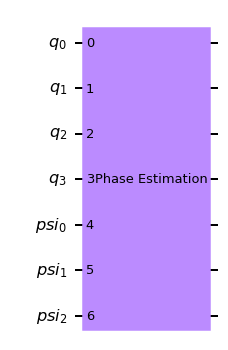

In [69]:
qr = QuantumRegister(4, 'q')
qr2 = QuantumRegister(3, 'psi')
qc = QuantumCircuit(qr, qr2)
pe = Gate(name='Phase Estimation', num_qubits=7, params=[])
qc.append(pe, [qr[0], qr[1], qr[2], qr[3], qr2[0], qr2[1], qr2[2]])
qc.draw(output='mpl')

The $|\Psi\rangle$ ("psi") above is the eigenvector of our unitary matrix. The input $|q\rangle$ is not important, but we plan to use $|0\rangle$. At the right side, the eigenvector will keep unchanged, while $|q\rangle$ will be magically converted to $|\theta\rangle$.

Let's start with the most simple case, where $U$ is just a single phase gate $P(\varphi)$. It's easy to get the eigenvalues $e^{2\pi\theta}$ with $\theta_0 = 0$ and $\theta_1 = \varphi/2\pi$. However, the accuracy of $\theta_0, \theta_1$ depends on the count of wires we have at the top. If there's only one qubit, the output is but whether $\theta$ is close to $0$ or $1$. Let's check this first:

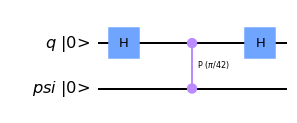

In [70]:
qr = QuantumRegister(1, 'q')
qr_psi = QuantumRegister(1, 'psi')
qc = QuantumCircuit(qr, qr_psi)
qc.h(0)
qc.cp(pi/42, 0, 1)
qc.h(0)
qc.draw(output='mpl', initial_state=True)

We can improve the accuracy by adding qubits on the top. When there are 2 qubits, we can return whether $\theta$ is close to $0$, $1/4$, $1/2$, and $3/4$, respectively:

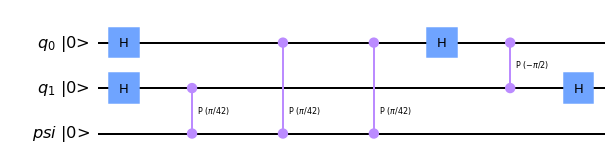

In [71]:
qr = QuantumRegister(2, 'q')
qr_psi = QuantumRegister(1, 'psi')
qc = QuantumCircuit(qr, qr_psi)
qc.h(0)
qc.h(1)
qc.cp(pi/42, 1, 2)
qc.cp(pi/42, 0, 2)
qc.cp(pi/42, 0, 2)
qc.h(0)
qc.cp(-pi/2, 0, 1)
qc.h(1)
qc.draw(output='mpl', initial_state=True)

If we go even further and become general, like when there are 4 qubits on the top and 3 qubits at the bottom, we will get something like:

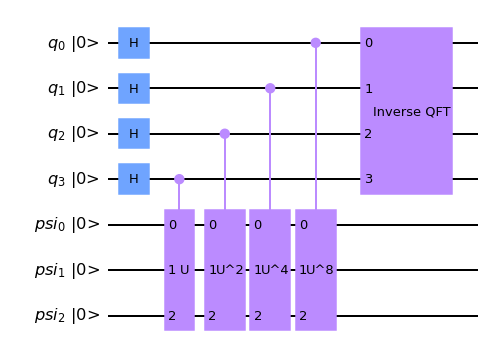

In [72]:
qr = QuantumRegister(4, 'q')
qr_psi = QuantumRegister(3, 'psi')
qc = QuantumCircuit(qr, qr_psi)
u = Gate(name='U', num_qubits=3, params=[])
u2 = Gate(name=r'U^2', num_qubits=3, params=[])
u4 = Gate(name=r'U^4', num_qubits=3, params=[])
u8 = Gate(name=r'U^8', num_qubits=3, params=[])
inverse_qft = Gate(name='Inverse QFT', num_qubits=4, params=[])
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.append(ControlledGate(name='', num_qubits=4, params=[], base_gate=u), [3, 4, 5, 6])
qc.append(ControlledGate(name='', num_qubits=4, params=[], base_gate=u2), [2, 4, 5, 6])
qc.append(ControlledGate(name='', num_qubits=4, params=[], base_gate=u4), [1, 4, 5, 6])
qc.append(ControlledGate(name='', num_qubits=4, params=[], base_gate=u8), [0, 4, 5, 6])
qc.append(inverse_qft, [0, 1, 2, 3])
qc.draw(output='mpl', initial_state=True)

We can find an obvious pattern from above: The input qubits go through Hadamard gates each, and the results are used as control of phase shift operations on the eigenvector. Later, the **inverse quantum Fourier Transform** takes place and output the $\theta$ we need. We'll now figure out what's happening in that module.

### Algorithm Walk-through [🔝](#table-of-contents) <a name="algorithm-walk-through"></a>

In this section, let's look at the phase estimation algorithm carefully. Suppose our initial state (the input) is $|\psi_0\rangle$, which is compose of:

$$
    |\psi'\rangle = |0\rangle^{\otimes n}|\psi\rangle
$$

Here the superscript $\otimes n$ is a shorthand for kronecker power; $|\psi\rangle$ is the eigenvector we use as the lower input. After performing Hadamard transformation on the top zeros, we will get:

$$
    |\psi''\rangle = \frac{1}{2^{n/2}}(|0\rangle + |1\rangle)^{\otimes n}|\psi\rangle
$$

Then, we perform the controlled unitary operations on each of the upper qubits. Recall that $\psi$ is the eigenvector, so $U|\psi\rangle$ always results in $e^{2\pi i \theta}|\psi\rangle$. The result is then calculated as follows:

$$
    \begin{align*}
        |\psi'''\rangle
        &= \frac{1}{2^{n/2}}\left(|0\rangle + e^{2\pi i\theta 2^0}|1\rangle\right) \otimes ... \otimes \left(|0\rangle + e^{2\pi i\theta 2^{n-1}}|1\rangle\right) \otimes |\psi\rangle \\
        &= \frac{1}{2^{n/2}}\sum_{k=0}^{2^n-1}e^{2\pi i\theta k}|k\rangle \otimes |\psi\rangle
    \end{align*}
$$

Here $k$ denotes the integers in the binary form.

The **quantum Fourier transform (QFT)** maps a state $|\psi\rangle = \sum_{j=0}^{N-1} \psi_j|j\rangle$ to a new one $|\psi'\rangle = \sum_{k=0}^{N-1} \psi_k|k\rangle$ according to the following formula:

$$
    \psi'_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}\omega_N^{jk}\psi_j
$$

where $\omega_N^{jk} = e^{2\pi ijk/N}$ (the subscript $N$ is sometimes omitted for conciseness). Note that the $N$ here is the max number of states we can have, i.e. $2^w$, where $w$ is the number of qubits. It's equivalent matrix form is:

$$
    U_\text{QFT} = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}\sum_{k=0}^{N-1} \omega_N^{jk}|k\rangle\langle j|
$$

We can write down this matrix explicitly:

$$
    U_\text{QFT} = 
    \frac{1}{\sqrt{N}}
    \begin{bmatrix}
        1 & 1 & 1 & \dots & 1 \\
        1 & \omega & \omega^2 & \dots & \omega^{N-1} \\
        1 & \omega^2 & \omega^4 & \dots & \omega^{2(N - 1)} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & \omega^{N-1} & \omega^{2(N-1)} & \dots & \omega^{(N-1)(N-1)}
    \end{bmatrix}
$$

In practice, we sometimes use the **inverse QFT** defined similarly to QFT:

$$
    \psi'_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}\omega_N^{-jk}\psi_j
$$

with the corresponding matrix form:

$$
    U_\text{IQFT} = 
    \frac{1}{\sqrt{N}}
    \begin{bmatrix}
        1 & 1 & 1 & \dots & 1 \\
        1 & \omega^{-1} & \omega^{-2} & \dots & \omega^{-(N-1)} \\
        1 & \omega^{-2} & \omega^{-4} & \dots & \omega^{-2(N - 1)} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & \omega^{-(N-1)} & \omega^{-2(N-1)} & \dots & \omega^{-(N-1)(N-1)}
    \end{bmatrix}
$$

It's probably not surprising that $U_\text{IQFT} = U_\text{QFT}^{-1}$ (you can quickly tell that from their matrix definition), that's also why it's named "inverse" QFT.

Okay, but what does everything above mean? Let's see what happens if we apply $U_\text{IQFT}$ on the upper register of $|\psi'''\rangle$:

$$
    \begin{align*}
        |\psi''''\rangle 
        &= \left(U_\text{IQFT}\frac{1}{2^{n/2}}\sum_{k=0}^{2^n-1}e^{2\pi i\theta k}|k\rangle\right) \otimes |\psi\rangle \\
        &= \frac{1}{N}\left(\sum_{x=0}^{N-1}\sum_{k=0}^{N-1}\omega_N^{-k(x - N\theta)}|x\rangle\right)\otimes |\psi\rangle \\
        &= \frac{1}{2^n}\sum_{x=0}^{2^n-1}\sum_{k=0}^{2^n-1}e^{-\frac{2\pi ik}{2^n}(x - 2^n\theta)}|x\rangle \otimes |\psi\rangle
    \end{align*}
$$

Now, recall that $\theta$ is within $[0, 1]$, and in binary base, a fraction can be represented as a sequence of $0$'s and $1$'s after the dot. When we multiply $\theta$ by $2^n$, we get something like $10(...)010.01(...)01$, which can be rounded as $a$ so that $2^n\theta = a + 2^n\delta$ where $a$ is an integer and $2^n|\delta|$ is between $[0, 0.5]$. This implies that $\delta$ is closest to $a/2^n$ among all multiples of $1/2^n$. In the same sense, we can write the final state $|\psi''''\rangle$ as:

$$
    |\psi''''\rangle 
    = \frac{1}{2^n}\sum_{x=0}^{2^n-1}\sum_{k=0}^{2^n-1}e^{-\frac{2\pi ik}{2^n}(x-a)}e^{2\pi i\delta k} |x\rangle \otimes |\psi\rangle
$$

Finally, we need to show that in the final state, the integer $|a\rangle$ will have the most probability among the $2^n$ possibilities (we omit the lower qubits):

$$
    \begin{align*}
        P(a)
        &= \left|\left\langle a\left| \frac{1}{2^n}\sum_{x=0}^{2^n-1}\sum_{k=0}^{2^n-1}e^{-\frac{2\pi ik}{2^n}(x-a)}e^{2\pi i\delta k} \right| x \right\rangle\right|^2 \\
        &= \frac{1}{2^{2n}}\left|\sum_{k=0}^{2^{2n}-1}e^{2\pi i\delta k}\right|^2 \\
        &= \begin{cases}
            1 & \delta = 0 \\
            \dfrac{1}{2^{2n}}\left|\dfrac{1 - e^{2\pi i2^n\delta}}{1-e^{2\pi i\delta}}\right|^2 & \delta \ne 0
        \end{cases}
    \end{align*}
$$

We can see that if $2^n\theta$ is an integer, the output will be $|2^n\theta\rangle \otimes |\psi\rangle$. Otherwise, we can get the greatest lower bound of the probability:

$$
    \begin{align*}
        P(a)
        &= \frac{1}{2^{2n}}\left|\frac{1 - e^{2\pi i2^n\delta}}{1-e^{2\pi i\delta}}\right|^2 \\
        &= \frac{1}{2^{2n}}\left|\frac{\sin(\pi 2^n\delta)}{\sin \pi \delta}\right|^2 \tag{$|1-e^{2ix}| = 4|\sin x|^2$} \\
        &\ge \frac{1}{2^{2n}}\frac{|2\cdot 2^n\delta|}{|\pi\delta|^2} \tag{$|2\cdot 2^{n}\delta| \le |\sin(\pi 2^n\delta)|$ when $|\delta| \le \frac{1}{2^{n+1}}$} \\
        &\ge \frac{4}{\pi^2} \approx 0.405
    \end{align*}
$$

This... is not perfect, since we cannot guarantee $|a\rangle$ has the highest probability, but it should be at least in the second place. The good news is that, if we increase the number of qubits, the accuracy will be improved. For any $\epsilon \in [0, 1]$, we need $O(\log(1/\epsilon))$ number of qubits to assure $P(a) \ge 1-\epsilon$ in the probability evaluation<sup>[\[2\]][2]</sup>.

[2]: https://arxiv.org/abs/quant-ph/9708016

### Controlled Unitary Gate <a name="controlled-unitary-gate"></a>

There's one thing left. We've used the controlled unitary gates to attach phases to the top register; however, how is that possible? Can we write a general formula for the controlled unitary gates regardless of the unitary gates we have? Good news is that there is a way to do this, but with extra wires (in specific, the same number of wires as the eigenstate).

Our main idea is to swap the wires with the auxiliary wires before the unitary matrix, and swap them back after. What we need is called a **Controlled Swap Gate**, i.e. $\text{CSWAP}$. To build it up, we need some preparation.

First let's use a simple notation for $\frac{\pi}{4}$ phase shift:

$$
    T = P\left(\frac{\pi}{4}\right)
    = \begin{bmatrix}
        1 & 0 \\ 0 & e^{i\frac{\pi}{4}}
    \end{bmatrix}
$$

The **Toffoli Gate**, or $\text{CCNOT}$ gate is a Pauli-X gate controlled by two qubits. The target qubit is flipped if and only if both control qubits are $1$. The matrix representation is:

$$
    \text{CCNOT} = 
    \begin{bmatrix}
        1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
        0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 \\
    \end{bmatrix}
$$

Long story short, a Toffoli gate can be decomposed into our universal gates. The matrix form is just too messy, so let's look at the circuit:

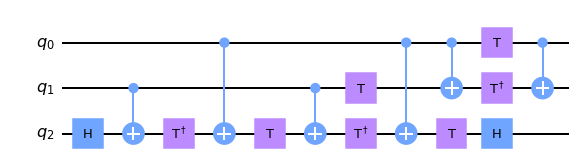

In [73]:
qc = QuantumCircuit(3)
qc.h(2)
qc.cx(1, 2)
qc.tdg(2)
qc.cx(0, 2)
qc.t(2)
qc.cx(1, 2)
qc.tdg(2)
qc.cx(0, 2)
qc.t(1)
qc.t(2)
qc.cx(0, 1)
qc.h(2)
qc.t(0)
qc.tdg(1)
qc.cx(0, 1)
qc.draw(output='mpl')

The $\text{CSWAP}$ gate can be easily built on two \text{CNOT}'s and a Toffoli gate:

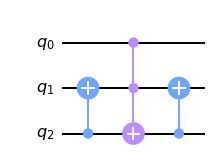

In [74]:
qc = QuantumCircuit(3)
qc.cx(2, 1)
qc.ccx(0, 1, 2)
qc.cx(2, 1)
qc.draw(output='mpl')

Now, an example of a controlled unitary matrix is as follows:

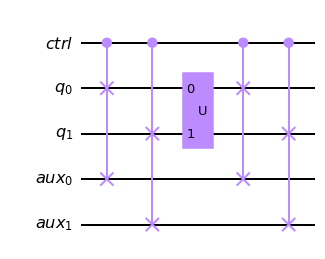

In [75]:
qr = QuantumRegister(1, 'ctrl')
qr_psi = QuantumRegister(2, 'q')
qr_aux = QuantumRegister(2, 'aux')
qc = QuantumCircuit(qr, qr_psi, qr_aux)
u = Gate(name='U', num_qubits=2, params=[])
qc.cswap(0, 1, 3)
qc.cswap(0, 2, 4)
qc.append(u, [1, 2])
qc.cswap(0, 1, 3)
qc.cswap(0, 2, 4)
qc.draw(output='mpl')

Again, we need to write a script to convert all non-atomic gates to our blessed Hadamard, phase shift, and CNOT gates:

In [29]:
def convert_toffoli(c1, c2, i):
    arg = pi / 4
    return [
        ['H', i],
        ['CNOT', c2, i],
        ['P', i, -arg],
        ['CNOT', c1, i],
        ['P', i, arg],
        ['CNOT', c2, i],
        ['P', i, -arg],
        ['CNOT', c1, i],
        ['P', i, arg],
        ['P', c2, arg],
        ['CNOT', c1, c2],
        ['H', i],
        ['P', c1, arg],
        ['P', c2, -arg],
        ['CNOT', c1, c2]
    ]

def convert_cswap(ctrl, i, j):
    return [
        ['CNOT', j, i],
        *convert_toffoli(ctrl, i, j),
        ['CNOT', j, i]
    ]

### Implementation [🔝](#table-of-contents) <a name="implementation"></a>

Now, we will design a quantum circuit to simulate the phase estimation algorithm. The initial Hadamard gates and phase shift matrices are easy.

In [124]:
def convert_qft(k, offset=0):
    if k == 1:
        return [
            ['H', offset]
        ]
    return [
        *convert_qft(k - 1, offset),
#         *[['CPHASE', offset + k - 1, offset + j, -pi/(2 ** (k - j - 1))] for j in range(0, k - 1)],
        *flatten([convert_controlled_phase(-pi/(2 ** (k-j-1)), offset + k - 1, offset + j) for j in range(0, k - 1)]),
        ['H', offset + k - 1]
    ]

def convert_iqft(k, offset=0):
    if k == 1:
        return [
            ['H', offset]
        ]
    return [
        *convert_iqft(k - 1, offset),
#         *[['CPHASE', offset + k - 1, offset + j, -pi/(2 ** (k - j - 1))] for j in range(0, k - 1)],
        *flatten([convert_controlled_phase(-pi/(2 ** (k-j-1)), offset + k - 1, offset + j) for j in range(0, k - 1)]),
        ['H', offset + k - 1]
    ]


def convert_phase_estimation(U, r1, r2):
    k = r1 + r2
    return [
        *[['H', j] for j in range(0, r1)],
        *flatten([flatten([
            flatten([convert_cswap(r1 - j, r1 + l, k + l) for l in range(0, k)]), 
            [U for l in range(0, 2 ** j)],
            flatten([convert_cswap(r1 - j, r1 + 1, k + l) for l in range(0, k)])]) for j in range(0, r1)]),
        *convert_iqft(0, r1),
        *flatten([convert_swap(j, r1 - j - 1) for j in range(0, r1 // 2)])
    ]

In [128]:
draw_qcircuit((5, convert_iqft(5)))
convert_iqft(5)

[['H', 0],
 ['P', 1, -0.7853981633974483],
 ['P', 0, -0.7853981633974483],
 ['CNOT', 1, 0],
 ['P', 0, 0.7853981633974483],
 ['CNOT', 1, 0],
 ['H', 1],
 ['P', 2, -0.39269908169872414],
 ['P', 0, -0.39269908169872414],
 ['CNOT', 2, 0],
 ['P', 0, 0.39269908169872414],
 ['CNOT', 2, 0],
 ['P', 2, -0.7853981633974483],
 ['P', 1, -0.7853981633974483],
 ['CNOT', 2, 1],
 ['P', 1, 0.7853981633974483],
 ['CNOT', 2, 1],
 ['H', 2],
 ['P', 3, -0.19634954084936207],
 ['P', 0, -0.19634954084936207],
 ['CNOT', 3, 0],
 ['P', 0, 0.19634954084936207],
 ['CNOT', 3, 0],
 ['P', 3, -0.39269908169872414],
 ['P', 1, -0.39269908169872414],
 ['CNOT', 3, 1],
 ['P', 1, 0.39269908169872414],
 ['CNOT', 3, 1],
 ['P', 3, -0.7853981633974483],
 ['P', 2, -0.7853981633974483],
 ['CNOT', 3, 2],
 ['P', 2, 0.7853981633974483],
 ['CNOT', 3, 2],
 ['H', 3],
 ['P', 4, -0.09817477042468103],
 ['P', 0, -0.09817477042468103],
 ['CNOT', 4, 0],
 ['P', 0, 0.09817477042468103],
 ['CNOT', 4, 0],
 ['P', 4, -0.19634954084936207],
 ['P', 1

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
[0.00000000e+00+0.j         9.99013364e-01+0.03139526j
 0.00000000e+00+0.j         9.86635786e-04-0.03139526j]
[0.        +0.j         0.99605735+0.06266662j 0.        +0.j
 0.00394265-0.06266662j]
[0.        +0.j         0.99114363+0.09369066j 0.        +0.j
 0.00885637-0.09369066j]
[0.        +0.j         0.98429158+0.12434494j 0.        +0.j
 0.01570842-0.12434494j]
[0.        +0.j        0.97552826+0.1545085j 0.        +0.j
 0.02447174-0.1545085j]
[0.        +0.j         0.96488824+0.18406228j 0.        +0.j
 0.03511176-0.18406228j]
[0.        +0.j         0.95241353+0.21288965j 0.        +0.j
 0.04758647-0.21288965j]
[0.        +0.j         0.93815334+0.24087684j 0.        +0.j
 0.06184666-0.24087684j]
[0.        +0.j        0.92216396+0.2679134j 0.        +0.j
 0.07783604-0.2679134j]
[0.       +0.j         0.9045085+0.29389263j 0.       +0.j
 0.0954915-0.29389263j]
[0.        +0.j         0.88525662+0.31871199j 0.        +0.j
 0.11474338-0.31871199j]

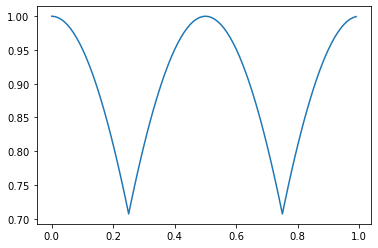

In [125]:
mlist = []
xs = []
for i in range(0, 100):
    phi = 2 * pi / 100 * i
    gates = [
        ['H', 0],
        *convert_controlled_phase(phi, 0, 1),
        ['H', 0]
    ]
    qs = quantum_simulator_3((2, gates), [0, 1, 0, 0])
    print(qs)
    p = [numpy.sqrt((p * p.conj()).real) for p in qs]
    mlist.append(max(p))
    xs.append(phi / (2 * pi))
plt.plot(xs, mlist)

[ 5.00000000e-01+0.j  5.00000000e-01+0.j -5.00000000e-01+0.j
  5.00000000e-01+0.j  3.11164266e-19+0.j -1.11855716e-17+0.j
 -3.11164266e-19+0.j -1.11855716e-17+0.j]
[ 4.99506682e-01+1.56976299e-02j  4.99753280e-01-3.57780254e-18j
 -4.99506682e-01-1.56976299e-02j  4.99753280e-01-3.57780254e-18j
  4.93317893e-04-1.56976299e-02j  8.54771716e-17-1.57053795e-02j
 -4.93317893e-04+1.56976299e-02j  8.54771716e-17-1.57053795e-02j]
[ 4.98028675e-01+3.13333084e-02j  4.99013364e-01+1.13315456e-17j
 -4.98028675e-01-3.13333084e-02j  4.99013364e-01+1.13315456e-17j
  1.97132467e-03-3.13333084e-02j  4.96863186e-18-3.13952598e-02j
 -1.97132467e-03+3.13333084e-02j  4.96863186e-18-3.13952598e-02j]
[ 4.95571813e-01+4.68453286e-02j  4.97780982e-01+1.13534650e-17j
 -4.95571813e-01-4.68453286e-02j  4.97780982e-01+1.13534650e-17j
  4.42818732e-03-4.68453286e-02j -3.63116363e-17-4.70541567e-02j
 -4.42818732e-03+4.68453286e-02j -3.63116363e-17-4.70541567e-02j]
[ 4.92145790e-01+6.21724718e-02j  4.96057351e-01-1.29

[ 1.97132467e-03-3.13333084e-02j -3.13952598e-02-4.96863186e-18j
 -1.97132467e-03+3.13333084e-02j -3.13952598e-02-4.96863186e-18j
  4.98028675e-01+3.13333084e-02j  1.17524601e-17-4.99013364e-01j
 -4.98028675e-01-3.13333084e-02j  1.17524601e-17-4.99013364e-01j]
[ 4.42818732e-03-4.68453286e-02j -4.70541567e-02+3.63116363e-17j
 -4.42818732e-03+4.68453286e-02j -4.70541567e-02+3.63116363e-17j
  4.95571813e-01+4.68453286e-02j  8.72584705e-18-4.97780982e-01j
 -4.95571813e-01-4.68453286e-02j  8.72584705e-18-4.97780982e-01j]
[ 7.85420972e-03-6.21724718e-02j -6.26666168e-02-8.01962733e-17j
 -7.85420972e-03+6.21724718e-02j -6.26666168e-02-8.01962733e-17j
  4.92145790e-01+6.21724718e-02j -1.20790301e-17-4.96057351e-01j
 -4.92145790e-01-6.21724718e-02j -1.20790301e-17-4.96057351e-01j]
[ 1.22358709e-02-7.72542486e-02j -7.82172325e-02+3.35473169e-17j
 -1.22358709e-02+7.72542486e-02j -7.82172325e-02+3.35473169e-17j
  4.87764129e-01+7.72542486e-02j -1.22498562e-17-4.93844170e-01j
 -4.87764129e-01-7.725

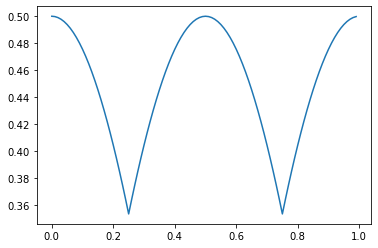

In [263]:
mlist = []
xs = []
for i in range(0, 100):
    phi = 2 * pi / 100 * i
    gates = [
        ['H', 0],
        ['H', 1],
        *convert_controlled_phase(phi, 1, 2),
        *convert_controlled_phase(phi, 0, 2),
        *convert_controlled_phase(phi, 0, 2),
        ['H', 0],
        *convert_controlled_phase(-pi/2, 0, 1),
        ['H', 1],
        ['CNOT', 0, 1],
        ['CNOT', 1, 0],
        ['CNOT', 0, 1]
    ]
    qs = quantum_simulator_1((3, gates), init_from_basis('1', 3))
    print(qs)
    p = [numpy.sqrt((p * p.conj()).real) for p in qs]
    mlist.append(max(p))
    xs.append(phi / (2 * pi))
plt.plot(xs, mlist)

## Shor's Algorithm

It's time to have some concrete algorithm! The **Shor's algorithm** is a factor finding algorithm explained in the following steps:

- If it's the trivial case, e.g. the number is prime, even ($N = 2x$) or the power of some integer ($N = x^a$), we can simply get the factor $2$ (in the former case) and $x$ (in the latter case).
- Choose a number $x$ between $(1, \sqrt{N}]$.
- Make sure $\text{gcd}(x, N) = 1$, otherwise $\text{gcd}(x, N)$ is a factor.
- (**period finding**) Find the minimum $r$ such that $x^r \equiv 1 (\text{mod}\ N)$; this is where our quantum algorithm takes place. If $r$ is odd, go find another $x$.
- Then, $x = (x^{r/2} + 1)(x^{r/2} - 1)$, which makes $\text{gcd}(x^{r/2} + 1, N)$ and $\text{gcd}(x^{r/2} - 1, N)$ both factors. If $x^{r/2} \pm 1$ are $1$ and $N$, skip them and find the next $r$ (this happens rarely).

This algorithm sounds not really complicated; we can easily implement one in python:

In [86]:
def shor_classical(n):
    def is_prime(n):
        if n == 2:
            return True
        if n % 2 == 0:
            return False
        for i in range(3, int(numpy.sqrt(n)) + 1, 2):
            if n % i == 0:
                return False
        return True
    
    def gcd(a, b):
        while b:
            a, b = b, a % b
        return a
    
    def inc(dic, n, ct=1):
        if n not in dic.keys():
            dic[n] = ct
        else:
            dic[n] += ct
    
    result = {}
    while not is_prime(n) and n > 1:
        if n % 2 == 0:
            inc(result, 2)
            n //= 2
            continue
        if n == 3:
            inc(result, n) if n == 3 else None
            break
        for a in range(2, int(sqrt(n)) + 1):
            f = pow(n, 1/a)
            if math.isclose(f, int(f)):
                ff = shor_classical(int(f))
                for (k, v) in ff.items():
                    inc(result, k, v * a)
                return result
        x = random.randint(2, int(sqrt(n)) + 1)
        d = math.gcd(x, n)
        if d != 1:
            df = shor_classical(d)
            result = { **result, **df }
            n //= d
            break
        for r in range(2, n):
            if int(x ** r) % n == 1:
                if r % 2 == 1:
                    break
                tmp = x ** (r//2)
                if tmp - 1 == 1 or tmp + 1 == n:
                    continue
                    
#                 print('x : ' + str(x))
#                 print('r : ' + str(r))
                d1 = math.gcd(tmp - 1, n)
                d2 = math.gcd(tmp + 1, n)
                df1 = shor_classical(d1)
                df2 = shor_classical(d2)
                result = { **result, **df1 }
                result = { **result, **df2 }
                n //= (d1 * d2)
    if n > 1:
        inc(result, n)
    return result

In [87]:
shor_classical(2)

{2: 1}

In [88]:
%%time
for i in range(10):
    n = random.randint(1000, 100000)
    print('Factors of ' + str(n) + ': ')
    print(shor_classical(n))

Factors of 74016: 
x : 19
r : 256
{2: 5, 3: 2, 257: 1}
Factors of 88418: 
x : 97
r : 2870
{2: 1, 11: 1, 4019: 1}
Factors of 81679: 
{13: 1, 6283: 1}
Factors of 8348: 
{2: 2, 2087: 1}
Factors of 13515: 
x : 31
r : 208
x : 8
r : 52
x : 6
r : 26
{3: 1, 5: 1, 53: 1, 17: 1}
Factors of 31480: 
x : 57
r : 1572
{2: 3, 787: 1, 5: 1}
Factors of 98893: 
{98893: 1}
Factors of 31009: 
{11: 1, 2819: 1}
Factors of 71675: 
x : 29
r : 1380
x : 33
r : 460
{47: 1, 5: 2, 61: 1}
Factors of 80170: 
x : 97
r : 8016
{2: 1, 5: 1, 8017: 1}
Wall time: 5min 35s


In [500]:
shor_classical(33)

x : 5
r : 10


{11: 1, 3: 1}

### Period Finding <a name="period-finding"></a>

Phase estimation is quite useful in the period finding step. Our goal is to find a unitary matrix $U_{x, N}$ whose eigenvalue is $r$, such that:

$$
    [x^r]_N = [1]_N
$$

From now, we will assume the number of qubits is $n = \lceil\log{N}\rceil$. Then:

$$
    U|j\rangle = |[jx]_N\rangle
$$

How is this helpful? Well, recall our notation in the Shor's algorithm. We want to find the minimal $r$ such that $x^r \equiv 1\ (\text{mod}\ N)$, where $x$ is a random integer taken from $[2, \sqrt{N}]$. Then, for any $x$ such that $\text{gcd}(x, N) = 1$:

$$
\begin{align*}
    U|1\rangle &= |[x]_N\rangle \\
    U^2|1\rangle &= |[x^2]_N\rangle \\
    \vdots & \\
    U^r|1\rangle &= |[1]_N\rangle
\end{align*}
$$

For example, let $x = 5$, $N = 22$, then we have:

$$
\begin{align*}
    U|1\rangle = |5\rangle \qquad U^2|1\rangle = |3\rangle \qquad U^3|1\rangle = |15\rangle \qquad U^4|1\rangle = |9\rangle \qquad U^5|1\rangle = |1\rangle
\end{align*}
$$

This gives us an important hint that, a superposition of states in this "loop" is an eigenstate of $U$. Still with $x = 5$, $N = 22$ (the coefficient $\frac{1}{\sqrt{5}}$ is for normalization):

$$
\begin{align*}
    |u\rangle 
    &= \frac{1}{\sqrt{5}}(|1\rangle + |5\rangle + |3\rangle + |15\rangle + |9\rangle) \\
    U|u\rangle 
    &= \frac{1}{\sqrt{5}}(U|1\rangle + U|5\rangle + U|3\rangle + U|15\rangle + U|9\rangle) \\
    &= \frac{1}{\sqrt{5}}(|5\rangle + |3\rangle + |15\rangle + |9\rangle + |1\rangle) \\
    &= \frac{1}{\sqrt{5}}|u\rangle
\end{align*}
$$

In general:

$$
    |u\rangle = \frac{1}{\sqrt{r}}\sum_{j=0}^{r-1} |[x^{j}]_N\rangle
$$

However, we want something more interesting, where the eigenvalue is not $1$. For example, consider including a factor:

$$
    |u\rangle  = \frac{1}{\sqrt{r}}\sum_{j=0}^{r-1} e^{-\frac{2\pi ij}{r}}\ \left|[x]_N^j\right\rangle
$$

Then:

$$
    \begin{align*}
        U|u\rangle
        &= \frac{1}{\sqrt{r}}\left(U|[1]_N\rangle + e^{-\frac{2\pi i}{r}}U\left|[x]_N\right\rangle + e^{-\frac{4\pi i}{r}}U\left|[x^2]_N\right\rangle + \dots + e^{-\frac{2(r - 1)\pi i}{r}}\ U\left|[x^{r-1}]_N\right\rangle\right) \\
        &= \frac{1}{\sqrt{r}}\left(|[x]_N\rangle + e^{-\frac{2\pi i}{r}}\left|[x^2]_N\right\rangle + e^{-\frac{4\pi i}{r}}\left|[x^3]_N\right\rangle + \dots + e^{-\frac{2(r - 1)\pi i}{r}}\ \left|[1]_N\right\rangle\right) \\
        &= e^{\frac{2\pi i}{r}}\frac{1}{\sqrt{r}}\left(e^{-\frac{2\pi i}{r}}|[x]_N\rangle + e^{-\frac{4\pi i}{r}}\left|[x^2]_N\right\rangle + e^{-\frac{6\pi i}{r}}\left|[x^3]_N\right\rangle + \dots + \left|[1]_N\right\rangle\right) \\
        &= e^{\frac{2\pi i}{r}}|u\rangle
    \end{align*}
$$

Then, for any $s \in [0, r - 1]$, we can get an eigenstate:

$$
    |u_s\rangle = \frac{1}{\sqrt{r}}\sum_{j=0}^{r-1}e^{-\frac{2\pi isj}{r}}\left|[x^j]_N\right\rangle
    \implies 
    U|u_s\rangle = e^{\frac{2\pi is}{r}}|u_s\rangle
$$

If we sum up all these eigenstates, there's an amazing result:

$$
    \begin{align*}
        \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1} |u_s\rangle 
        &= \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\left[\frac{1}{\sqrt{r}}\sum_{j=0}^{r-1}e^{-\frac{2\pi isj}{r}}\left|[x^j]_N\right\rangle\right] \\
        &= \frac{1}{r}\bigg[
            \left(|[1]_N\rangle + |[x]_N\rangle + |[x^2]_N\rangle + \dots + |[x^{r-1}]_N\rangle \right) \\
            & \quad + \left(|[1]_N\rangle + e^{-\frac{2\pi i}{r}}|[x]_N\rangle + e^{-\frac{4\pi i}{r}}|[x^2]_N\rangle + \dots + e^{-\frac{2(r - 1)\pi i}{r}}|[x^{r-1}]_N\rangle\right) \\
            & \quad + \left(|[1]_N\rangle + e^{-\frac{4\pi i}{r}}|[x]_N\rangle + e^{-\frac{8\pi i}{r}}|[x^2]_N\rangle + \dots + e^{-\frac{4(r - 1)\pi i}{r}}|[x^{r-1}]_N\rangle\right) \\
            & \quad \vdots \\
            & \quad + \left(|[1]_N\rangle + e^{-\frac{2(r-1)\pi i}{r}}|[x]_N\rangle + e^{-\frac{4(r-1)\pi i}{r}}|[x^2]_N\rangle + \dots + e^{-\frac{2(r-1)^2\pi i}{r}}|[x^{r-1}]_N\rangle\right)
        \bigg] \\
        &= \frac{1}{r}\bigg[
            \left(1 + 1 + 1 + \dots + 1\right)|[1]_N\rangle \\
            & \quad + \left(1 + e^{-\frac{2\pi i}{r}} + e^{-\frac{4\pi i}{r}} + \dots + e^{-\frac{2(r-1)\pi i}{r}}\right)|[x]_N\rangle \\
            & \quad + \left(1 + e^{-\frac{4\pi i}{r}} + e^{-\frac{8\pi i}{r}} + \dots + e^{-\frac{4(r-1)\pi i}{r}}\right)|[x^2]_N\rangle \\
            & \quad \vdots \\
            & \quad + \left(1 + e^{-\frac{2(r-1)\pi i}{r}} + e^{-\frac{4(r-1)\pi i}{r}} + \dots + e^{-\frac{2(r-1)^2\pi i}{r}}\right)|[x^{r-1}]_N\rangle
        \bigg] \\
        &= |1\rangle
    \end{align*}
$$

This means that if we do phase estimation with $|1\rangle$ (sum of eigenvectors), the output from the inverse QFT will be:

$$
\begin{align*}
    \frac{1}{\sqrt{r}}\left(\left|2^n \cdot \frac{1}{r}\right\rangle + \left|2^n\cdot \frac{2}{r}\right\rangle + \dots + \left|2^n\cdot \frac{r - 1}{r}\right\rangle\right)
\end{align*}
$$

Here the phase is:

$$
    \phi = \frac{s}{r}
$$

for $s \in [0, r - 1]$. We will input $\frac{1}{\sqrt{r}}\sum |u_s\rangle = |1\rangle$ as the eigenstate, and we will get a superposition of eigenvalues. On measurement, we are bound to get one of them.

Now, the only problem is to generate such a matrix $U(x, N)$ that satisfies:

$$
\begin{align*}
    U(x, N) := |j\rangle \mapsto
    \begin{cases}
        |[xj]_N\rangle & \text{if $j < N$} \\
        |j\rangle & \text{if $j \ge N$}
    \end{cases}
\end{align*}
$$

We can generate such a matrix by python:

In [244]:
def period_finding_matrix(x, N):
    assert math.gcd(x, N) == 1
    
    size = 2 ** math.ceil(math.log(N, 2))
    result = numpy.zeros((size, size))
    result[0, 0] = 1
    for i in range(1, size):
        if i < N:
            result[i * x % N, i] = 1
        else:
            result[i, i] = 1
    return result

In [264]:
pfm = period_finding_matrix(2, 15)
pfm @ init_from_basis('3', 4)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [279]:
shor_classical(10110)

x : 2
r : 4


{2: 1, 3: 1, 5: 1, 337: 1}

In [268]:
# TODO
def shor_period(n):
    def is_prime(n):
        if n == 2:
            return True
        if n % 2 == 0:
            return False
        for i in range(3, int(numpy.sqrt(n)) + 1, 2):
            if n % i == 0:
                return False
        return True
    
    def inc(dic, n, ct=1):
        if n not in dic.keys():
            dic[n] = ct
        else:
            dic[n] += ct
    
    result = {}
    while not is_prime(n) and n > 1:
        if n % 2 == 0:
            inc(result, 2)
            n //= 2
            continue
        if n == 3:
            inc(result, n) if n == 3 else None
            break
        for a in range(2, int(sqrt(n)) + 1):
            f = pow(n, 1/a)
            if math.isclose(f, int(f)):
                ff = shor_classical(int(f))
                for (k, v) in ff.items():
                    inc(result, k, v * a)
                return result
        x = random.randint(2, int(sqrt(n)) + 1)
        d = math.gcd(x, n)
        if d != 1:
            df = shor_classical(d)
            result = { **result, **df }
            n //= d
            break
        for r in range(2, n):
            if int(x ** r) % n == 1:
                if r % 2 == 1:
                    break
                tmp = x ** (r//2)
                if tmp - 1 == 1 or tmp + 1 == n:
                    continue
                    
                d1 = math.gcd(tmp - 1, n)
                d2 = math.gcd(tmp + 1, n)
                df1 = shor_classical(d1)
                df2 = shor_classical(d2)
                result = { **result, **df1 }
                result = { **result, **df2 }
                n //= (d1 * d2)
    if n > 1:
        inc(result, n)
    return result

In [141]:
2 ** 3

8

In [281]:
circ = read_circuit_file('./data/measure.circuit')
qs = quantum_simulator_2(circ)
check_vector_validity(qs)

00000 : (0.03409461975165974+0j); 
00001 : (0.014675527864780113+0j); 00010 : (0.047972577870148546+0j); 00011 : (0.0015344333324749195+0j); 00100 : (0.013915241797331281+0j); 
00101 : (0.004043865411763249+0j); 00110 : (0.00726757445525252+0j); 00111 : (0.0002670388164266028+0j); 01000 : (0.213149685470434+0j); 
01001 : (0.09263850269053595+0j); 01010 : (0.015210162105033275+0j); 01011 : (0.0014685822096425225+0j); 01100 : (0.023245130505696387+0j); 
01101 : (0.012382081775642838+0j); 01110 : (0.017759676684420585+0j); 01111 : (0.0003752992587550379+0j); 10000 : (0.1586456011746431+0j); 
10001 : (0.0680448363662178+0j); 10010 : (0.018985285248662147+0j); 10011 : (0.000684502526609985+0j); 10100 : (0.04159888288072047+0j); 
10101 : (0.017408049658067117+0j); 10110 : (0.01650516504968562+0j); 10111 : (8.295350571212767e-05+0j); 11000 : (0.07152752240958499+0j); 
11001 : (0.029185819093328166+0j); 11010 : (0.0388144374366952+0j); 11011 : (0.002718369012729405+0j); 11100 : (0.009778562155

True

In [318]:
myState2=[
  (numpy.sqrt(0.1)*1.j, '101'),
  (numpy.sqrt(0.5), '000') ,
  (-numpy.sqrt(0.4), '010' )
]

print(state_to_vector(myState2))
print(vector_to_state(state_to_vector(myState2)))

[ 0.70710677+0.j          0.        +0.j         -0.6324555 +0.j
  0.        +0.j          0.        +0.j          0.        +0.31622776j
  0.        +0.j          0.        +0.j        ]
[((0.70710677+0j), '000'), ((-0.6324555+0j), '010'), (0.31622776j, '101')]


In [307]:
a = ['abc', 'def', 'acd']
a.sort(key=lambda s : s [1])
a

['abc', 'acd', 'def']

## Utilities

There are some helpful functions I wrote to better complete this post. Run the following cells right after the import statements to ensure the validity of code above.

In [142]:
def reload_header():
    Javascript("Jupyter.notebook.execute_cells([7])")

def flatten(arr):
    return list(chain.from_iterable(arr))

def binary_to_decimal(binary):
    result = 0
    for d in binary:
        result = result * 2 + int(d)
    return str(result)

def decimal_to_binary(decimal, length):
    result = bin(decimal)[2:]    # abandon the '0b' prefix
    return '0'*(length - len(result)) + result

def draw_hadamard_gate():
    qc = QuantumCircuit(1, name='Hadamard')
    qc.h(0)
    return qc.draw(output='mpl')

def draw_phase_gate(theta):
    qc = QuantumCircuit(1, name='Phase')
    qc.p(theta, 0)
    return qc.draw(output='mpl')

def draw_cnot_gate():
    qc = QuantumCircuit(2, name='CNOT')
    qc.cx(0, 1)
    return qc.draw(output='mpl')

def draw_tonc_gate():
    qc = QuantumCircuit(2, name='TONC')
    qc.cx(1, 0)
    return qc.draw(output='mpl')

def draw_pauli_x_gate():
    qc = QuantumCircuit(1, name='Pauli-X (NOT)')
    qc.h(0)
    qc.z(0)
    qc.h(0)
    return qc.draw(output='mpl')

def draw_pauli_y_gate():
    qc = QuantumCircuit(1, name='Pauli-Y')
    qc.p(pi/2, 0)
    qc.x(0)
    qc.p(-pi/2, 0)
    return qc.draw(output='mpl')
    
def draw_pauli_z_gate():
    qc = QuantumCircuit(1, name='Pauli-Z')
    qc.p(pi, 0)
    return qc.draw(output='mpl')

def draw_rotate_x_gate():
    qc = QuantumCircuit(1, name='Rotation-X')
    pass

def draw_rotate_y_gate():
    pass

def draw_rotate_z_gate():
    pass

def draw_qcircuit_example():
    qc = QuantumCircuit(3)
    qc.h(1)
    qc.h(2)
    qc.p(numpy.pi / 6, 2)
    qc.cx(2, 1)
    qc.h(1)
    qc.h(2)
    qc.cx(2, 0)
    return qc.draw(output='mpl')

# draw a quantum circuit using qiskit
def draw_qcircuit_universal(code, k):
    qc = QuantumCircuit(k)
    for gate in code:
        name = gate[0]
        i = gate[1]
        if name == 'H':
            qc.h(i)
        elif name == 'P':
            qc.p(gate[2], i)
        elif name == 'CNOT':
            qc.cx(i, gate[2])
    return qc.draw(output='mpl', fold=-1)

# draw an arbitrary circuit using qiskit
def draw_qcircuit(circ):
    (w, gates) = circ
    qc = QuantumCircuit(w)
    for g in gates:
        name = g[0]
        if name == 'H':
            qc.h(int(g[1]))
        elif name == 'P':
            qc.p(eval(str(g[2])), int(g[1]))
        elif name == 'CNOT':
            qc.cx(int(g[1]), int(g[2]))
        elif name == 'X':
            qc.x(int(g[1]))
        elif name == 'Y':
            qc.y(int(g[1]))
        elif name == 'Z':
            qc.z(int(g[1]))
        elif name == 'RX':
            qc.rx(eval(str(g[2])), int(g[1]))
        elif name == 'RY':
            qc.ry(eval(str(g[2])), int(g[1]))
        elif name == 'RZ':
            qc.rz(eval(str(g[2])), int(g[1]))
        elif name == 'SWAP':
            qc.swap(int(g[1]), int(g[2]))
        elif name == 'CCNOT':
            qc.ccx(int(g[1]), int(g[2]), int(g[3]))
        elif name == 'CRX':
            qc.crx(eval(str(g[3])), int(g[1]), int(g[2]))
        elif name == 'CRY':
            qc.cry(eval(str(g[3])), int(g[1]), int(g[2]))
        elif name == 'CRZ':
            qc.crz(eval(str(g[3])), int(g[1]), int(g[2]))
        elif name == 'CPHASE':
            qc.cp(eval(str(g[3])), int(g[1]), int(g[2]))
    return qc.draw(output='mpl', fold=-1)
            

# turn a numpy.matrix to a tex matrix.
# saves me tons of time
def matrix_to_tex(mat):
    result = '\\begin{bmatrix}\n'
    (row_ct, col_ct) = mat.shape
    for i in range(0, row_ct):
        tmp = '    '
        for j in range(0, col_ct):
            curr = mat[i, j]
            if math.isclose(curr, 0):
                tmp += '0'
            elif math.isclose(curr, 1):
                tmp += '1'
            elif math.isclose(curr, 1 / numpy.sqrt(2)):
                tmp += '\\frac{1}{\\sqrt{2}}'
            elif math.isclose(curr, -1 / numpy.sqrt(2)):
                tmp += '-\\frac{1}{\\sqrt{2}}'
            else:
                tmp += str(mat[i, j])
            tmp += ' & '
        result += tmp[:-2] + '\\\\\n'
    result += '\\end{bmatrix}'
    print(result)
    
def show_matrix_pattern(mat, black='■', blank='□'):
    result = ''
    (row_ct, col_ct) = mat.shape
    for i in range(0, row_ct):
        for j in range(0, col_ct):
            result += blank if math.isclose(abs(mat[i, j]), 0) else black
            result += ' '         # a half space
        result += '\n'
    print(result)
    
def approximate(mat, l=0):
    result = []
    (row_ct, col_ct) = mat.shape
    for i in range(0, row_ct):
        result.append([])
        for j in range(0, col_ct):
            result[i].append(round(mat[i, j].real, l) + 1j * round(mat[i, j].imag, l))
    return result

Also, I defined several variables for convenience:

In [4]:
I2 = numpy.identity(2, dtype='complex128')
R2 = numpy.array([[0, 1], [1, 0]], dtype='complex128')
S2 = sparse.csr_matrix(I2)

Other setup:

In [3]:
path = './data/benchmark_dataset'
if not os.path.exists(path):
    os.makedirs(path)